In [5]:
!pip install mocodo
!pip install cairosvg

  Stored in directory: C:\Users\info\AppData\Local\pip\Cache\wheels\db\24\08\1abc12855b8ea58e8616b7516c6ba98e6ff5a53bf0b0ff0f5f
Successfully built cairocffi


In [6]:


%reload_ext mocodo

Mocodo 3.0.8 loaded.


In [2]:
from IPython import display
from pathlib import Path

![](https://cdn.rawgit.com/laowantong/mocodo/master/logos/banner.svg)

# Introduction

Mocodo est un logiciel d'aide √† l'enseignement et √† la conception des [bases de donn√©es relationnelles](https://fr.wikipedia.org/wiki/Base_de_donn√©es_relationnelle).

- En entr√©e, il prend une description textuelle des entit√©s et associations du mod√®le conceptuel de donn√©es ([MCD](https://fr.wikipedia.org/wiki/Mod√®le_entit√©-association)).
- En sortie, il produit son diagramme entit√©-association en [SVG](https://fr.wikipedia.org/wiki/Scalable_Vector_Graphics) et son sch√©ma relationnel ([MLD](https://fr.wikipedia.org/wiki/Merise_(informatique)#MLD_:_mod√®le_logique_des_donn√©es)) en [SQL](https://fr.wikipedia.org/wiki/Structured_Query_Language), [$\mathrm\LaTeX$](https://fr.wikipedia.org/wiki/LaTeX), [Markdown](https://fr.wikipedia.org/wiki/Markdown), etc.

Ci-dessous, un exemple d'appel du programme (premi√®re ligne) sur un texte d'entr√©e (lignes suivantes), puis, en sortie, le MCD et le MLD correspondants:

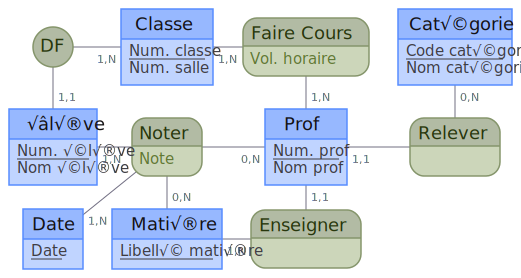

In [7]:
%%mocodo --mld --colors ocean --shapes copperplate --relations diagram markdown_data_dict
DF, 11 √âl√®ve, 1N Classe
Classe: Num. classe, Num. salle
Faire Cours, 1N Classe, 1N Prof: Vol. horaire
Cat√©gorie: Code cat√©gorie, Nom cat√©gorie

√âl√®ve: Num. √©l√®ve, Nom √©l√®ve
Noter, 1N √âl√®ve, 0N Prof, 0N Mati√®re, 1N Date: Note
Prof: Num. prof, Nom prof
Relever, 0N Cat√©gorie, 11 Prof

Date: Date
Mati√®re: Libell√© mati√®re
Enseigner, 11 Prof, 1N Mati√®re

L'appel ci-dessus a √©galement construit le dictionnaire des donn√©es:

In [8]:
display.Markdown("mocodo_notebook/sandbox_data_dict.md")

- Code cat√É¬©gorie
- Nom cat√É¬©gorie
- Num. classe
- Num. salle
- Date
- Vol. horaire
- Libell√É¬© mati√É¬®re
- Note
- Num. prof
- Nom prof
- Num. √É¬©l√É¬®ve
- Nom √É¬©l√É¬®ve

Ainsi que le diagramme relationnel, qui peut √™tre visualis√© par un nouvel appel:

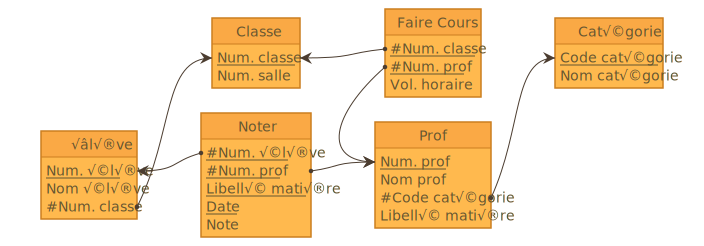

In [9]:
%mocodo --input mocodo_notebook/sandbox.mld --colors desert

# Installation du programme

## Installation compl√®te (recommand√©)

- Installez la [distribution Anaconda](https://www.anaconda.com/products/distribution), qui contient Python 3, Jupyter Notebook et bien plus encore.
- Ex√©cutez ensuite sous un terminal la ligne suivante pour installer Mocodo ainsi que sa ¬´¬†commande magique¬†¬ª (utilisable sous [Jupyter notebook](https://jupyter.org))¬†:

        python -m pip install mocodo

- Si vous souhaitez g√©n√©rer des figures en PDF ou en PNG¬†:

        python -m pip install cairosvg

## V√©rification

Toujours sous un terminal, tapez:

    mocodo

Si votre syst√®me se plaint que cette commande n'existe pas, localisez le fichier `mocodo` et ajoutez √† votre `PATH` le chemin du r√©pertoire contenant:
- [sous Linux ou macOS](http://www.commentcamarche.net/faq/3585-bash-la-variable-d-environnement-path#v-ajouter-un-repertoire-a-la-variable-path);
- [sous Windows](http://sametmax.com/ajouter-un-chemin-a-la-variable-denvironnement-path-sous-windows/).

Pour mettre la ¬´¬†commande magique¬†¬ª `mocodo` √† disposition d'un _notebook_ donn√©, √©valuez dans celui-ci la cellule suivante:

    %reload_ext mocodo

Techniquement, `%load_ext mocodo` suffit, mais cette forme vous √©pargnera un message d'erreur si vous r√©√©valuez ult√©rieurement la cellule.

Pour tester, √©valuez une cellule avec:

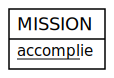

In [8]:
%%mocodo
MISSION: accomplie

Pour charger automatiquement `mocodo` √† chaque ouverture d'un notebook (ce qui dispense d'√©valuer `%load_ext mocodo`)¬†:

- ex√©cuter sous un terminal¬†:

			ipython profile create
	
- √©diter le fichier cr√©√© (p. ex.: `~/.ipython/profile_default/ipython_config.py`) pour remplacer les lignes suivantes¬†:

			## A list of dotted module names of IPython extensions to load.
			#c.InteractiveShellApp.extensions = []

  par celles-ci¬†:

			## A list of dotted module names of IPython extensions to load.
			c.InteractiveShellApp.extensions = [
			    "mocodo",
			]

## Installation minimale

- Si vous √™tes sous macOS ou Linux, vous avez d√©j√† Python 3. Dans le cas contraire, vous devrez probablement [l'installer](https://www.python.org/downloads/).
- Une fois Python install√©, tapez sous un terminal:

      python -m pip install mocodo

Vous ne b√©n√©ficierez pas de Jupyter Notebook, mais vous pourrez utiliser Mocodo en ligne de commande.

# Utilisation

Vous pouvez utiliser Mocodo¬†:

- √† distance, sans rien installer, avec [Mocodo _online_](https://www.mocodo.net);
- en local, comme n'importe quel programme Python;
- dans un document Jupyter Notebook (√† l'instar de cette documentation).

## Utiliser Mocodo _online_

Faites pointer votre navigateur sur www.mocodo.net¬†: vous pouvez commencer √† taper votre MCD. Appuyez √† tout moment sur le bouton de g√©n√©ration pour visualiser le diagramme conceptuel et en d√©duire les relations. Une fois que le r√©sultat vous convient, appuyez sur le bouton de t√©l√©chargement pour r√©cup√©rer une archive ZIP contenant tous les fichiers d'entr√©e et de sortie sp√©cifi√©s.

Mocodo _online_ est con√ßu pour une utilisation occasionnelle et/ou interactive, et son interface vise avant tout √† la simplicit√©. Vous n'avez donc acc√®s qu'aux options essentielles du programme. Si vous en voulez davantage, tant en termes de param√©trage que de calcul ou de fonctionnalit√©s, installez Mocodo sur votre machine.

## Utiliser Mocodo en ligne de commande

### Au plus simple

Tout a √©t√© fait pour faciliter au maximum la prise en main. Ainsi, pour peu que vous sachiez lancer une console (`cmd` sous Windows, Terminal sous macOS), il vous suffit d'y entrer:

```
mocodo
```

Invoqu√© sous cette forme, le script r√©cup√®re le texte d'entr√©e du MCD dans le r√©pertoire courant sous le nom de `sandbox.mcd`. Si ce fichier n'existe pas, il y sera automatiquement cr√©√© avec un MCD d'exemple. Par la suite, vous n'aurez qu'√† le garder ouvert sous un √©diteur de texte, afin de le modifier selon vos besoins avant de relancer la commande.

### Liste des arguments

La commande `mocodo` admet de nombreux arguments optionnels. Voici la traduction en fran√ßais de la liste affich√©e par l'argument `--help`. Destin√©e √† servir de r√©f√©rence, elle peut √™tre [saut√©e](#Description-d'un-MCD) sans inconv√©nient √† la premi√®re lecture. Nous avons ajout√© des liens vers des exemples d'utilisation dans ce document¬†; notez cependant que les `%%` ou `%` qui pr√©fixent la ¬´¬†commande magique¬†¬ª `mocodo` doivent √™tre omis de la ligne de commande.

#### Options sur Mocodo lui-m√™me

- **`--help`**.
  Affiche un message d'aide, puis termine.
- **`--version`**.
  Affiche le num√©ro de version, puis termine.
- **`--language CODE`**.
  Outrepasse la localisation automatique des messages avec le code de langage donn√© (p. ex., `fr`, `en`, ...) (d√©faut: langue du syst√®me).
- **`--restore`**.
  Recr√©e une version originelle des fichiers `sandbox.mcd` et `params.json` dans le r√©pertoire d'entr√©e, puis termine (d√©faut: `False`).

#### Entr√©e-sortie

- **`--params_path PATH`**.
  Le chemin du fichier de param√®tres. S'il est omis, utilise `params.json` dans le r√©pertoire d'entr√©e. Si ce fichier n'existe pas, utilise les param√®tres par d√©faut (d√©faut: `params.json`).
- **`--input PATH`**.
  Le chemin du fichier d'entr√©e. Les fichiers de sortie seront par d√©faut g√©n√©r√©s dans le m√™me r√©pertoire (d√©faut: `sandbox.mcd`). 
- **`--output_dir PATH`**.
  Le r√©pertoire o√π g√©n√©rer les fichiers de sortie (d√©faut: le r√©pertoire o√π se trouve le fichier d'entr√©e). 
- **`--encodings [STR [STR ...]]`**.
  Un ou plusieurs encodages √† essayer successivement pour lire le fichier d'entr√©e (d√©faut: `utf8`, puis encodage historique de la plateforme).
- [**`--pdf`**](Conversion-dans-d'autres-formats-graphiques).
  G√©n√®re une version PDF de la sortie graphique (requiert CairoSVG).
- [**`--png`**](Conversion-dans-d'autres-formats-graphiques).
  G√©n√®re une version PNG de la sortie graphique (requiert CairoSVG).
- **`--print_params`**.
  Affiche le contenu du fichier de param√®tres, puis termine (d√©faut: `False`).
- [**`--reuse_geo`**](#Par-modification-du-fichier--de-g%C3%A9om%C3%A9trie).
  Utilise le fichier de g√©om√©trie g√©n√©r√© lors de la pr√©c√©dente ex√©cution.

#### Aspect de la sortie graphique

- [**`--df STR`**](#Symbole-de-d%C3%A9pendance-fonctionnelle).
  Acronyme √† encercler dans une d√©pendance fonctionnelle (d√©faut: `DF`).
- [**`--card_format STR`**](#Format-des-cardinalit%C3%A9s).
  Cha√Æne de format pour les cardinalit√©s minimale et maximale (d√©faut: `{min_card},{max_card}`).
- [**`--strengthen_card STR`**](#Entit%C3%A9s-faibles-(identification-relative)).
  Cha√Æne pour les cardinalit√©s relatives (d√©faut: `_1,1_`).
- [**`--flex FLOAT`**](#Basculement-des-cardinalit%C3%A9s-et-inflexion-des-pattes-rectilignes).
  Infl√©chit les pattes rectilignes dont les cardinalit√©s sont susceptibles de collision (d√©faut: `0.75`).
- [**`--colors PATH`**](#Introduction).
  Palette de couleurs √† utiliser lors de la g√©n√©ration du dessin. Nom (sans extension) d'un fichier du r√©pertoire `colors`, ou chemin vers un fichier personnel (d√©faut: `bw`).
- [**`--shapes PATH`**](#Introduction).
  Sp√©cification des polices, des dimensions, etc. Nom (sans extension) d'un fichier du r√©pertoire `shapes`, ou chemin vers un fichier personnel (d√©faut: d√©pendant de votre syst√®me).
- [**`--scale SCALE`**](#Introduction).
  Facteur d'√©chelle multiplicatif (d√©faut: `1.0`).
- **`--adjust_width SCALE`**.
  Facteur multiplicatif appliqu√© √† la largeur des libell√©s (d√©faut: `1.0`).
- **`--hide_notes`**.
  Ignore le survol des √©l√©ments annot√©s (d√©faut: `False`).
- **`--detect_overlaps`**.
  L√®ve une erreur en pr√©sence de chevauchement de pattes horizontales ou verticales.

#### Sortie relationnelle

- [**`--relations [NAME [NAME ...]]`**](#Construction-de-repr%C3%A9sentations-externes).
  Un ou plusieurs gabarits pour les sch√©mas relationnels g√©n√©r√©s. Cf. r√©pertoire `relation_templates` (d√©faut: `html text`).
- [**`--disambiguation {numbers_only,notes}`**](#R%C3%A9tablissement-explicite-de-la-s%C3%A9mantique-des-DF-disparues).
  M√©thode de d√©sambigu√Øsation des attributs migrants homonymes (d√©faut: `notes`).
- [**`--title STR`**](#Sorties-SQL).
  Nom de la base (utilis√© pour la sortie SQL) (d√©faut: `Sans titre`).
- **`--guess_title`**.
  Utiliser le nom de l'entit√© la plus r√©f√©renc√©e comme titre (d√©faut: `False`).

#### Modifications du texte d'entr√©e

- [**`--arrange [{bb,ga}]`**](#R%C3%A9arrangement-automatique).
  Met en page le diagramme, soit par s√©paration et √©valuation (_branch and bound_), soit avec un algorithme g√©n√©tique (_genetic algorithm_), puis termine (d√©faut: `None`).
- **`--timeout SECONDS`**.
  Limite la dur√©e du calcul de la mise en page (d√©faut: `None`).
- **`--verbose`**.
  Affiche des d√©tails oiseux lors du r√©arrangement (d√©faut: `False`).
- [**`--flip {h,v,d}`**](#R%C3%A9arrangement-par-sym%C3%A9trie).
  Affiche une version retourn√©e horizontalement / verticalement / diagonalement du texte d'entr√©e, puis termine (d√©faut: `None`).
- [**`--fit [INT]`**](#Ajustement-automatique-dans-une-grille-minimale).
  Reformate le texte d'entr√©e dans la i√®me plus petite grille possible, puis termine (d√©faut: `None`).
- [**`--obfuscate [PATH]`**](#Remplacer-tous-les-libell%C3%A9s-par-du-faux-texte-(obfuscation)).
  Affiche une version du texte d'entr√©e vid√©e de sa s√©mantique, puis termine. Cf. r√©pertoire `lorem` (d√©faut: `None`).
- [**`--obfuscation_max_length INT`**](#Remplacer-tous-les-libell%C3%A9s-par-du-faux-texte-(obfuscation)).
  Longueur maximale des mots de substitution (d√©faut: `None`).
- [**`--obfuscation_min_distance INT`**](#Remplacer-tous-les-libell%C3%A9s-par-du-faux-texte-(obfuscation)).
  Distance de Damerau Levenshtein minimale entre deux mots de substitution (d√©faut: 3).
- [**`--seed FLOAT`**](#R%C3%A9arrangement-automatique).
  Valeur du germe du g√©n√©rateur al√©atoire (d√©faut: `None`).

#### R√©arrangement par s√©paration et √©valuation

Sous-options accessibles avec l'option `--arrange=bb`.

- **`--call_limit INT`**.
  Nombre maximal d'appels pour une bo√Æte de d√©part donn√©e (d√©faut: `10000`).
- **`--min_objective INT`**.
  Meilleur objectif esth√©tique pour la mise en page (d√©faut: `0`).
- **`--max_objective INT`**.
  Pire objectif esth√©tique pour la mise en page (d√©faut: `15`).
- [**`--organic`**](#Par-croissance-organique).
  R√©arrangement non limit√© √† la grille originelle (d√©faut: `False`).

#### R√©arrangement par algorithme g√©n√©tique

Sous-options accessibles avec l'option `--arrange=ga`.

  - **`--population_size INT`**.
    Nombre d'individus √† faire √©voluer (d√©faut: `1000`).
  - **`--crossover_rate RATE`**.
    Taux de croisement, entre 0 et 1 (d√©faut: `0.9`).
  - **`--mutation_rate RATE`**.
    Taux de mutation, entre 0 et 1 (d√©faut: `0.06`).
  - **`--sample_size INT`**.
    Taille de l'√©chantillon pour les tournois (d√©faut: `7`).
  - **`--max_generations INT`**.
    Nombre maximal de g√©n√©rations (d√©faut: `300`).
  - **`--plateau INT`**.
    Nombre maximal de g√©n√©rations cons√©cutives sans am√©lioration (d√©faut: `30`).

#### Options sp√©cifiques aux Notebooks

Ignor√©es lors de l'appel en ligne de commande.

  - [**`--mld`**](#Passage-au-relationnel).
    Affiche le sch√©ma relationnel en HTML dans la sortie de la cellule (d√©faut: `False`).
  - [**`--no_mcd`**](#R%C3%A9tablissement-explicite-de-la-s%C3%A9mantique-des-DF-disparues).
    N'affiche pas le diagramme conceptuel dans la sortie de la cellule (d√©faut: `False`).
  - [**`--replace`**](#Modification-in-situ-d'une-cellule).
    Remplace le contenu de la cellule par le r√©sultat de son √©valuation (d√©faut: `False`).

### Param√©trage √† long terme

Pour √©viter d'avoir √† invoquer Mocodo r√©p√©titivement avec une longue kyrielle d'options, vous pouvez mettre celles-ci une fois pour toutes dans un fichier `params.json` situ√© dans le r√©pertoire de lancement de Mocodo. La commande:

    mocodo --restore

... le fait pour vous avec un fichier de param√®tres vide, i.e. , un fichier-texte r√©duit aux deux caract√®res `{}`  (attention, elle r√©tablit aussi le fichier `sandbox.mcd` √† son contenu par d√©faut). Vous √™tes encourag√©s √† modifier ce fichier de param√®tres selon vos go√ªts et vos besoins. De la sorte, le style de vos MCD pourra √™tre maintenu √† moindre frais √† travers tous vos documents. En cas de besoin, vous pourrez toujours ponctuellement passer outre ces r√©glages en en pr√©cisant d'autres en ligne de commande. Plus pr√©cis√©ment, chaque param√®tre est d√©termin√©:

1. par sa valuation en ligne de commande;
2. √† d√©faut, par sa valuation dans le fichier de param√®tres indiqu√© par `--params_path`;
3. √† d√©faut d'une telle indication, par sa valuation dans le fichier `params.json` du r√©pertoire courant;
4. √† d√©faut, par une valeur d√©faut √©ventuellement d√©pendante de votre syst√®me.

Si vous lancez Mocodo avec l'option `--print_params`, la valeur courante de l'ensemble des param√®tres sera affich√©e. Vous pouvez envoyer la sortie dans un fichier `params.json` et la modifier √† votre gr√© pour une prise en compte lors du lancement suivant.

## Utiliser Mocodo sous Jupyter Notebook

### Invocation

Elle n√©cessite l'installation de l'extension notebook `mocodo`, laquelle doit en outre √™tre recharg√©e √† chaque ouverture (`%reload_ext mocodo`, cf. premi√®re cellule du pr√©sent document). On a ainsi d√©clar√© une ¬´¬†commande magique¬†¬ª `mocodo` qui sera invoqu√©e en la pr√©fixant:

- de `%%` pour prendre toutes les lignes suivantes de la cellule comme texte d'entr√©e du MCD¬†;
- de `%` si l'on r√©cup√®re l'entr√©e ailleurs (avec `--input`), ou qu'on n'en a pas besoin (p. ex., `--help` ou `--print_params`).

√Ä part √ßa, la syntaxe est g√©n√©ralement la m√™me qu'en ligne de commande, ce qui devrait faciliter le passage de l'un √† l'autre.

### Principes de fonctionnement

Il peut √™tre utile de comprendre ce qui se passe en coulisses lorsque l'on invoque la commande magique sur une cellule:

- dans le r√©pertoire courant est cr√©√© au besoin un sous-r√©pertoire `mocodo_notebook`;
- le texte d'entr√©e y est sauvegard√© sous le nom de `sandbox.mcd`;
- la commande est lanc√©e sur ce fichier avec tous les param√®tres donn√©s par l'utilisateur. Cela signifie que tous les fichiers g√©n√©r√©s le seront au m√™me endroit sous les noms de `sandbox.svg`, `sandbox.html`, etc.;
- si la commande a produit un dessin, celui-ci est affich√© en sortie (sauf avec l'option `--no_mcd`); avec l'option `--mld`, le sch√©ma relationnel est √©galement affich√© au-dessous (au format HTML);
- si elle n'a pas produit de dessin, mais une nouvelle version du texte d'entr√©e (options `--arrange`, `--flip`, `--obfuscate`, ...), Mocodo est automatiquement relanc√© sur celle-ci, permettant de visualiser le diagramme et/ou le sch√©ma relationnel correspondants.

Tous les fichiers peuvent √™tre lus dans le r√©pertoire `mocodo_notebook` (commande magique `%load`, mise en commentaire dans ce notebook pour √©viter de recharger le fichier √† chaque ex√©cution).

### Exemples d'invocation

Les trois exemples de l'[introduction](#Introduction) illustrent plusieurs de ces techniques usuelles:

    %%mocodo --mld --colors ocean --shapes copperplate --relations diagram markdown_data_dict

... invoque le programme en demandant l'affichage du diagramme conceptuel (implicitement), du sch√©ma relationnel (avec `--mld`), des changements de style (avec `--colors` et `--shapes`) et la production d'un diagramme relationnel (`--relations diagram`) et d'un dictionnaire de donn√©es (`markdown_data_dict`). Le contenu de celui-ci est recharg√© et visualis√© √† l'aide de la commande suivante:

    %load mocodo_notebook/sandbox_data_dict.md

Tandis que le diagramme relationnel (MLD) est trac√© en relan√ßant Mocodo dessus:

    %mocodo --input mocodo_notebook/sandbox.mld --colors desert

### Modification _in situ_ d'une cellule

**Nouveaut√© de la version 2.0.20 (contribution de Thomas Giro).** Avec les options `--arrange`, `--flip` et `--obfuscate` le r√©sultat de l'√©valuation de la cellule est un nouveau MCD, normalement affich√© au-dessous. Ajoutez l'option `--replace` pour substituer ce MCD au contenu de la cellule. R√©√©valuez alors celle-ci pour tracer le MCD r√©sultant, ou annulez la derni√®re op√©ration pour revenir au contenu originel.

Par exemple, l'√©valuation de la cellule suivante:

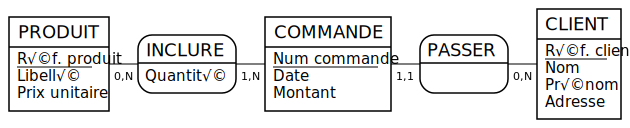

In [9]:
%%mocodo
PRODUIT: R√©f. produit, Libell√©, Prix unitaire
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
COMMANDE: Num commande, Date, Montant
PASSER, 0N CLIENT, 11 COMMANDE
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse

... remplacerait celle-ci par celle-l√†:

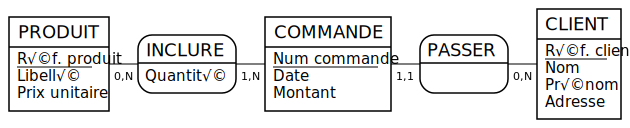

In [10]:
%%mocodo
PRODUIT: R√©f. produit, Libell√©, Prix unitaire
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
COMMANDE: Num commande, Date, Montant
PASSER, 0N CLIENT, 11 COMMANDE
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse

### Param√©trage √† long terme

Si vous voulez √©viter de pr√©ciser √† chaque fois les m√™mes arguments (par exemple un changement de couleurs), vous pouvez placer un fichier `params.json` dans le r√©pertoire `mocodo_notebook`. Mocodo peut m√™me vous aider √† le faire en ex√©cutant la cellule suivante:

In [11]:
# You may edit and run the following lines
import json, pathlib
params = """
{
  "adjust_width": 1,
  "arrange": null,
  "call_limit": 10000,
  "card_format": "{min_card},{max_card}",
  "colors": "bw",
  "crossover_rate": 0.9,
  "df": "DF",
  "disambiguation": "notes",
  "encodings": [
    "utf8",
    "macroman"
  ],
  "fit": null,
  "flex": 0.75,
  "flip": null,
  "guess_title": false,
  "hide_notes": false,
  "input": "mocodo_notebook/sandbox.mcd",
  "language": "fr",
  "max_generations": 300,
  "max_objective": 15,
  "min_objective": 0,
  "mld": false,
  "mutation_rate": 0.06,
  "no_mcd": false,
  "obfuscate": null,
  "obfuscation_min_distance": 3,
  "organic": false,
  "output_dir": "mocodo_notebook",
  "pdf": false,
  "plateau": 30,
  "png": false,
  "population_size": 1000,
  "print_params": false,
  "relations": [
    "html"
  ],
  "replace": false,
  "restore": false,
  "reuse_geo": false,
  "sample_size": 7,
  "scale": 1,
  "seed": null,
  "shapes": "copperplate",
  "strengthen_card": "_1,1_",
  "timeout": null,
  "title": "Sans titre",
  "verbose": false
}
"""
try:
    json.loads(params)
except:
    raise RuntimeError("Invalid JSON. Check your syntax on https://jsonlint.com.")
pathlib.Path("mocodo_notebook/params.json").write_text(params.strip(), encoding="utf8")

1005

Son √©valuation remplace son propre contenu par des lignes de code similaires √†: 

In [12]:
# You may edit and run the following lines
import json, pathlib
params = """
{
  "adjust_width": 1,
  "arrange": null,
  "call_limit": 10000,
  "card_format": "{min_card},{max_card}",
  "colors": "bw",
  "crossover_rate": 0.9,
  "df": "DF",
  "disambiguation": "notes",
  "encodings": [
    "utf8",
    "macroman"
  ],
  "fit": null,
  "flex": 0.75,
  "flip": null,
  "guess_title": false,
  "hide_notes": false,
  "input": "mocodo_notebook/sandbox.mcd",
  "language": "fr",
  "max_generations": 300,
  "max_objective": 15,
  "min_objective": 0,
  "mld": false,
  "mutation_rate": 0.06,
  "no_mcd": false,
  "obfuscate": null,
  "obfuscation_max_length": null,
  "obfuscation_min_distance": 3,
  "organic": false,
  "output_dir": "mocodo_notebook",
  "pdf": false,
  "plateau": 30,
  "png": false,
  "population_size": 1000,
  "print_params": false,
  "relations": [
    "html"
  ],
  "replace": false,
  "restore": false,
  "reuse_geo": false,
  "sample_size": 7,
  "scale": 1,
  "seed": null,
  "shapes": "copperplate",
  "strengthen_card": "_1,1_",
  "timeout": null,
  "title": "Sans titre",
  "verbose": false
}
"""
try:
    json.loads(params)
except:
    raise RuntimeError("Invalid JSON. Check your syntax on https://jsonlint.com.")
pathlib.Path("mocodo_notebook/params.json").write_text(params.strip(), encoding="utf8")

1039

Modifiez la variable `params` √† votre gr√© en respectant la syntaxe [JSON](http://json.org) (attention en particulier au dernier couple cl√©-valeur, qui n'est pas termin√© par une virgule). Ex√©cutez la cellule pour cr√©er un fichier de nom et emplacement ad√©quats (notez que la valeur de `--print_params` a √©t√© pass√©e √† `false` pour vous √©viter de le faire √† la main).

# Description d'un MCD

## Besoins √©l√©mentaires

### Entit√©s, associations, attributs, identifiants, cardinalit√©s

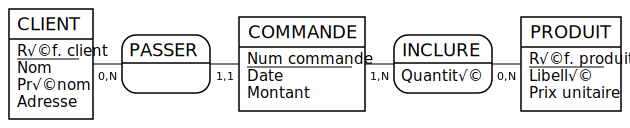

In [13]:
%%mocodo
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
PASSER, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

La syntaxe ne devrait pas poser probl√®me¬†:
- une entit√© est d√©finie par¬†:
    -¬†son nom,
    - deux-points,
    - sa liste d'attributs s√©par√©s par des virgules¬†;
- une association est d√©finie par¬†:
    - son nom,
    - virgule,
    - les cardinalit√©s et l'entit√© distingu√©e par sa premi√®re patte,
    - virgule,
    - les cardinalit√©s et l'entit√© de sa deuxi√®me patte,
    - etc.,
    - deux-points,
    - sa liste d'attributs s√©par√©s par des virgules.

√Ä noter¬†:
- le premier attribut d'une entit√© est consid√©r√© par d√©faut comme son identifiant, et donc soulign√©;
- pour les associations sans attributs, le deux-points est facultatif;
- la premi√®re ligne:
        %%mocodo
  ... ne fait pas partie de la description. Dans ce document, elle permet de faire appel √† une ¬´¬†commande magique¬†¬ª, qui lance Mocodo sur les lignes qui la suivent. Sauf sous Jupyter Notebook, vous pouvez l'omettre dans votre texte d'entr√©e.
  De fa√ßon g√©n√©rale, la ou les premi√®res lignes d'un MCD qui commencent par le symbole de pourcentage (`%`) sont ignor√©es. Cela permet de placer en en-t√™te un commentaire qui pourra √™tre pr√©serv√© lors des √©ventuels r√©arrangements ult√©rieurs.
- Les accents pr√©sents dans votre fichier d'entr√©e sont correctement g√©r√©s pourvu que vous ayez enregistr√© celui-ci dans l'encodage attendu par Mocodo en entr√©e: c'est par d√©faut Unicode UTF-8. Une tol√©rance existe: si Mocodo √©choue √† d√©coder votre fichier avec `utf8`, il se rabattra sur le codec d'Europe de l'Ouest associ√© historiquement √† votre plateforme: `iso-8859-15` pour Windows et Linux, `mac-roman` pour macOS. Si les accents n'apparaissent pas correctement, vous aurez encore trois solutions:
  1. soit (fortement conseill√©), r√©-enregistrer votre fichier en UTF-8 au lieu d'un encodage historique;
  3. soit (ponctuellement), passer l'encodage de votre fichier en argument avec `--encodings`;
  2. soit (√† long terme), modifier dans `params.json` la liste des encodages pris en charge.

### D√©pendances fonctionnelles

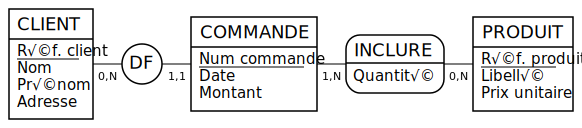

In [14]:
%%mocodo
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
DF, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

Si on a plusieurs d√©pendances fonctionnelles √† repr√©senter, on devra suffixer le DF par un chiffre de 0 √† 9 (cf. [cet exemple](#Cr%C3%A9ation-de-plusieurs-entit%C3%A9s-ou-associations-de-m%C3%AAme-nom)).

### Associations r√©flexives

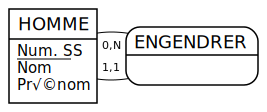

In [15]:
%%mocodo
HOMME: Num. SS, Nom, Pr√©nom
ENGENDRER, 0N HOMME, 11 HOMME

### Placement sur plusieurs rang√©es

L'ordre et la s√©paration des lignes de la description permet de sp√©cifier √† co√ªt z√©ro un plongement grossier, mais qui s'av√®re en g√©n√©ral suffisant:

- les bo√Ætes (entit√©s et associations) d√©finies sur des lignes cons√©cutives sont trac√©es sur une m√™me rang√©e;
- un saut de ligne indique une nouvelle rang√©e.

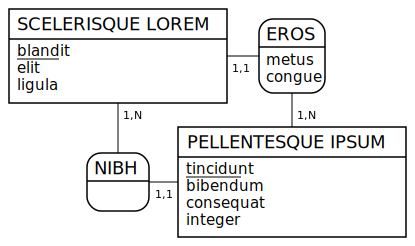

In [16]:
%%mocodo
SCELERISQUE LOREM: blandit, elit, ligula
EROS, 11 SCELERISQUE LOREM, 1N PELLENTESQUE IPSUM: metus, congue

NIBH, 1N SCELERISQUE LOREM, 11 PELLENTESQUE IPSUM
PELLENTESQUE IPSUM: tincidunt, bibendum, consequat, integer

Les bo√Ætes sont plac√©es aux intersections d'une grille invisible assurant que leurs centres soient align√©s aussi bien horizontalement que verticalement. C'est ce qui en g√©n√©ral est le plus satisfaisant esth√©tiquement, mais d'autres retouches peuvent √™tre op√©r√©es manuellement dans le fichier de sortie.

Le plongement fait l'objet d'une ¬´¬†compression¬†¬ª horizontale et verticale. Par exemple, ci-dessus, il y a un espace horizontal n√©gatif entre le bord droit de l'entit√© de gauche et le bord gauche de l'entit√© de droite.

## Besoins plus avanc√©s

### Identifiants multiples

Pr√©fixer d'un tiret bas (`_`) les second, troisi√®me, etc. attributs pour les ajouter √† l'identifiant.

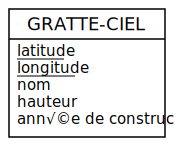

In [17]:
%%mocodo
GRATTE-CIEL: latitude, _longitude, nom, hauteur, ann√©e de construction

### Fl√®ches sur les pattes

Suffixer d'un chevron (`<` ou `>`) les cardinalit√©s de la patte concern√©e. La direction indiqu√©e se lit en partant de l'association et en allant vers l'entit√©.

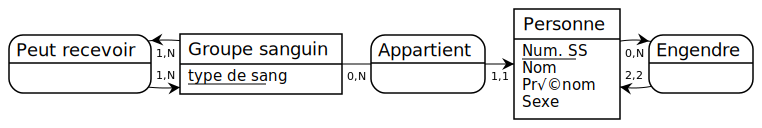

In [18]:
%%mocodo
Peut recevoir, 1N> Groupe sanguin, 1N< Groupe sanguin
Groupe sanguin: type de sang
Appartient, 11> Personne, 0N Groupe sanguin
Personne: Num. SS, Nom, Pr√©nom, Sexe
Engendre, 0N< Personne, 22> Personne

La position de la fl√®che sur la patte peut √™tre r√©gl√©e individuellement dans l'objet `ratio` du fichier de g√©om√©trie g√©n√©r√© (par d√©faut, `sandbox_geo.json`) ou sous l'onglet _Retouches_ de la version en ligne. La valeur correspondante peut varier de `0.0` (fl√®che cach√©e sous la bo√Æte d'origine) √† `1.0` (par d√©faut, pointe de la fl√®che au contact du bord de la bo√Æte de destination, compte non tenu de l'arrondi s'il s'agit d'une association).

### Styles

Plusieurs styles pr√©d√©finis sont distribu√©s avec l'application. Un style se d√©finit comme la combinaison d'une palette de couleurs (r√©pertoire `colors`) avec un dictionnaire de polices et de dimensions (r√©pertoire `shapes`). Un changement d'√©chelle d'un facteur multiplicatif positif peut √™tre pr√©cis√© avec l'argument `--scale`.

Vous pouvez bien s√ªr cr√©er vos propres styles en vous inspirant des fichiers fournis. Si vous √™tes particuli√®rement content d'un style, soumettez-le pour inclusion dans une prochaine distribution.

**Nouveaut√© de la version 3.0** Une approximation de la largeur des caract√®res des diff√©rentes polices a √©t√© pr√©-calcul√©e sous macOS. Il est possible qu'elle soit inexacte, en particulier sous Windows ou Linux. Dans ce cas, en particulier, les traits de soulignement n'atteindront pas ou exc√©deront la largeur des libell√©s soulign√©s. Vous pouvez contourner le probl√®me en appliquant un facteur multiplicatif avec l'argument `--adjust_width`).

### Types de donn√©es

Chaque attribut peut √™tre assorti de notes entre crochets. Ignor√©es au niveau du trac√© du MCD, elles sont [interpr√©t√©es comme des types de donn√©es lors de la g√©n√©ration d'un code-source SQL](#Sorties-SQL).

### Format des cardinalit√©s

Par d√©faut, les cardinalit√©s sont s√©par√©es par une virgule.

**Nouveaut√© de la version 2.1.** On peut maintenant opter pour un format quelconque:

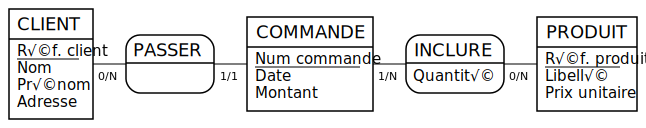

In [19]:
%%mocodo --card_format={min_card}/{max_card}
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
PASSER, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

### Rectification automatique des cardinalit√©s mal form√©es

Certaines fautes de frappe fr√©quentes (inversion des cardinalit√©s minimale et maximale, lettre ¬´¬†O¬†¬ª au lieu du chiffre ¬´¬†0¬†¬ª) sont silencieusement rectifi√©es, d'autres non (lettres ¬´¬†l¬†¬ª ou ¬´¬†I¬†¬ª)¬†:

| formes erron√©es | forme rectifi√©e |
|-----------------|-----------------|
| `O1`, `o1`, `10`, `1O`, `1o` | `01` |
| `ON`, `oN`, `NO`, `No`, `N0` | `0N` |
| `On`, `on`, `no`, `nO`, `n0` | `0n`|
| `N1` | `1N` |
| `n1` | `1n` |

Les cardinalit√©s (N,N), qui selon une certaine √©cole d√©notent une cardinalit√© minimale sup√©rieure √† 1, sont laiss√©es telles quelles.

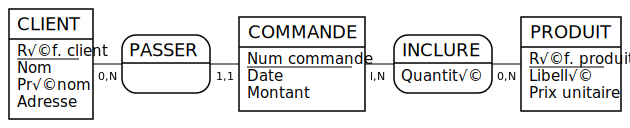

In [20]:
%%mocodo
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
PASSER, oN CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, lN COMMANDE, ON PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

### Symbole de d√©pendance fonctionnelle

Il est possible d'activer l'encerclement d'un autre sigle que DF. C'est ce sigle qui devra alors appara√Ætre en entr√©e, par exemple:

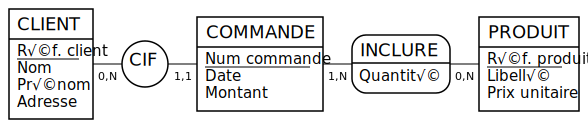

In [21]:
%%mocodo --df=CIF
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
CIF, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

Comme le cercle est alors un peu plus grand, on peut vouloir r√©gler (_a priori_ une fois pour toutes) le ratio d√©fini dans l'objet `shapes` du fichier appel√© par d√©faut `sandbox_geo.json`):

```
"df_text_height_ratio" : 1.00,
```

### Cr√©ation de plusieurs entit√©s ou associations de m√™me nom

Normalement on doit choisir des noms diff√©rents pour toutes les bo√Ætes (entit√©s et associations) du MCD, √† l'exception des associations de d√©pendance fonctionnelle figur√©es par un sigle. On a vu que dans ce cas, il suffisait d'ajouter √† leur nom un chiffre de 0 √† 9¬†: celui-ci n'appara√Ætra pas en sortie.

Cette possibilit√© vaut pour n'importe quelle bo√Æte, y compris les triangles d√©notant l'h√©ritage (p. ex. `/1\` ou `/XT2\`).

Seul le dernier chiffre est concern√©. Cela limite √† 10 le nombre d'entit√©s ou associations homonymes, mais peut √™tre utile si vous avez besoin, pour une raison ou une autre, qu'un suffixe num√©rique apparaisse dans le nom d'une bo√Æte. Il suffit alors d'ajouter encore un chiffre √† celui-ci.

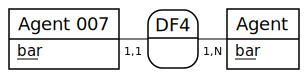

In [144]:
%%mocodo
Agent 0070: bar
DF42, 11 Agent 0070, 1N Agent1
Agent1: bar

La cr√©ation de bo√Ætes homonymes servira typiquement √† ¬´¬†distribuer¬†¬ª une entit√© DATE r√©duite √† son identifiant _date_, mais associ√©e √† de nombreuses entit√©s qui n'ont rien √† voir entre elles. Sachant qu'une telle entit√© est amen√©e √† dispara√Ætre lors du passage au relationnel, il n'y a aucun inconv√©nient √† en cr√©er plusieurs, et cela peut avoir l'avantage de faciliter (ou m√™me de rendre possible) l'obtention d'une bonne mise en page.

Par exemple, la mise en page du MCD suivant est ind√ªment complexifi√©e par le haut degr√© de l'entit√© DATE.

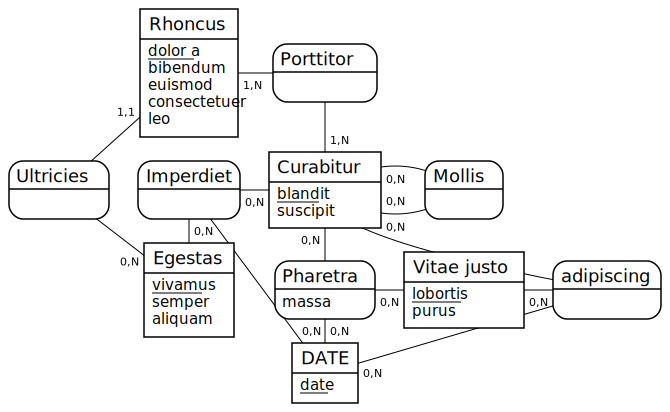

In [22]:
%%mocodo
:
Rhoncus: dolor a, bibendum, euismod, consectetuer, leo
Porttitor, 1N Rhoncus, 1N Curabitur
:
:

Ultricies, 11 Rhoncus, 0N Egestas
Imperdiet, 0N Egestas, 0N Curabitur, 0N DATE
Curabitur: blandit, suscipit
Mollis, 0N Curabitur, 0N Curabitur
:

:
Egestas: vivamus, semper, aliquam
Pharetra, 0N Curabitur, 0N DATE, 0N Vitae justo: massa
Vitae justo: lobortis, purus
adipiscing, 0N Curabitur, 0N Vitae justo, 0N DATE

:
:
DATE: date
:
:

Ajouter une autre entit√© DATE (sous le nom de DATE2) permettra √† Mocodo de calculer une mise en page √† la fois plus agr√©able √† l'≈ìil et plus compacte (√† savoir, $4\times3$ au lieu de $5\times4$). La s√©mantique est inchang√©e.

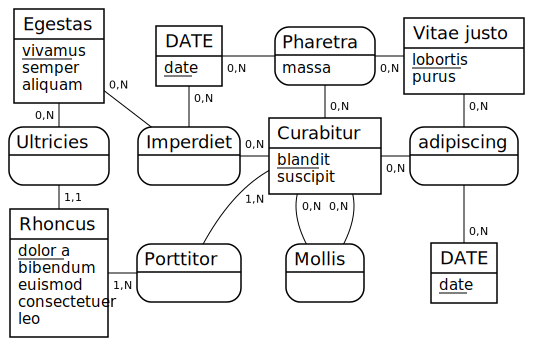

In [23]:
%%mocodo
Egestas: vivamus, semper, aliquam
DATE: date
Pharetra, 0N Curabitur, 0N DATE, 0N Vitae justo: massa
Vitae justo: lobortis, purus

Ultricies, 11 Rhoncus, 0N Egestas
Imperdiet, 0N Egestas, 0N Curabitur, 0N DATE
Curabitur: blandit, suscipit
adipiscing, 0N Curabitur, 0N Vitae justo, 0N DATE2

Rhoncus: dolor a, bibendum, euismod, consectetuer, leo
Porttitor, 1N Rhoncus, 1N Curabitur
Mollis, 0N Curabitur, 0N Curabitur
DATE2: date

## Extensions du mod√®le

### Entit√©s faibles (identification relative)

Pr√©fixer d'un tiret bas (`_`) une cardinalit√© (1,1) pour indiquer que l'entit√© distingu√©e est faible. Dans le diagramme, les identifiants (ou discriminants) d'une telle entit√© seront soulign√©s en pointill√©s, tandis que le (1,1) sera soulign√© d'un trait plein.

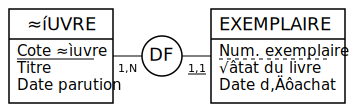

In [24]:
%%mocodo
≈íUVRE: Cote ≈ìuvre, Titre, Date parution
DF, 1N ≈íUVRE, _11 EXEMPLAIRE
EXEMPLAIRE: Num. exemplaire, √âtat du livre, Date d'achat

**Nouveaut√© de la version 2.1.** Traditionnellement, l'identification relative est d√©not√©e par des parenth√®ses autour des cardinalit√©s. Cette notation (ou toute autre) peut maintenant √™tre obtenue avec l'option `--strenghten_card`:

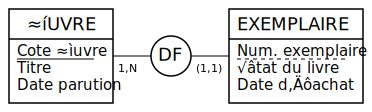

In [25]:
%%mocodo --strengthen_card (1,1)
≈íUVRE: Cote ≈ìuvre, Titre, Date parution
DF, 1N ≈íUVRE, _11 EXEMPLAIRE
EXEMPLAIRE: Num. exemplaire, √âtat du livre, Date d'achat

Une association ne peut renforcer plus d'une entit√© faible. Ainsi, une erreur se produit si l'on remplace le `1N` par `_11`:

In [26]:
%%mocodo
≈íUVRE: Cote ≈ìuvre, Titre, Date parution
DF, _11 ≈íUVRE, _11 EXEMPLAIRE
EXEMPLAIRE: Num. exemplaire, √âtat du livre, Date d'achat

Mocodo Err.22 - Identification relative r√©ciproque autour de ¬´¬†DF¬†¬ª.

### Conversion forc√©e d'une association DF en table

Normalement, les associations DF disparaissent lors du passage en relationnel. Il est cependant possible de forcer la cr√©ation d'une table √©ponyme. Cela se fait en mettant entre crochets droits le nom de l'association (avant la version 3, on pr√©fixait d'une barre oblique l'une au moins des entit√©s non distingu√©es par un (0,1)).

Au niveau visualisation, un rectangle en pointill√©s appara√Æt autour de l'association, indiquant que celle-ci va devenir une table.

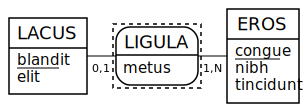

In [27]:
%%mocodo
LACUS: blandit, elit
[LIGULA], 01 LACUS, 1N EROS: metus
EROS: congue, nibh, tincidunt

La motivation et les d√©tails sont discut√©s dans la section [Passage au relationnel / Conversion forc√©e d'une association DF en table](#Conversion-forc√©e-d'une-association-DF-en-table).

### Agr√©gation (ou pseudo-entit√©)

Le MCD ci-dessous a (au moins) un d√©faut¬†:

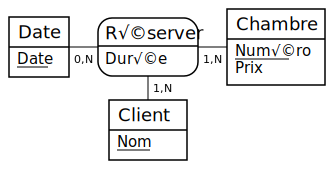

In [28]:
%%mocodo
Date: Date
R√©server, 1N Client, 1N Chambre, 0N Date: Dur√©e
Chambre: Num√©ro, Prix

Client: Nom

Il n'emp√™che pas les ¬´¬†surr√©servations¬†¬ª¬†: deux clients peuvent r√©server la m√™me chambre pour la m√™me nuit. En effet, deux r√©servations sont compl√®tement identifi√©es avec les m√™mes date et num√©ro de chambre d√®s lors que le nom du client est diff√©rent.

La notion d'agr√©gation vient √† la rescousse. Elle permet d'agr√©ger les entit√©s DATE et CHAMBRE, ainsi que l'association R√âSERVER, en une ¬´¬†pseudo-entit√©¬†¬ª qui sera alors consid√©r√©e comme associ√©e √† l'entit√© CLIENT.

Dans la syntaxe de Mocodo, il suffit de pr√©fixer la cardinalit√© de CLIENT d'une barre oblique (avant la version 3, cela se faisait en pr√©fixant le nom de l'entit√© et non sa cardinalit√©)¬†:

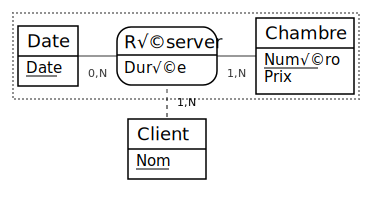

In [29]:
%%mocodo
Date: Date
R√©server, /1N Client, 1N Chambre, 0N Date: Dur√©e
Chambre: Num√©ro, Prix

Client: Nom

Cette visualisation elle-m√™me est une nouveaut√© de la version 3. Notez que la repr√©sentation traditionnelle demanderait √† ins√©rer une association DF entre CLIENT et R√âSERVER, ce qui donnerait ceci¬†:

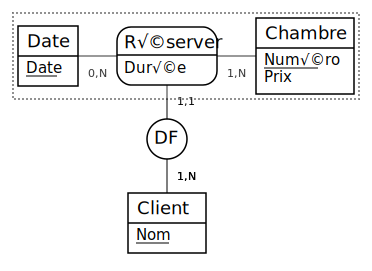

In [30]:
display.SVG("traditional_cluster.svg")

... mais permettre l'association d'une entit√© et d'une association demanderait √† apporter au code de Mocodo des changements cons√©quents, pour un b√©n√©fice qui ne nous saute pas forc√©ment aux yeux.

Notez qu'on peut se passer de la notion d'agr√©gation d√®s lors que l'on a celle d'entit√© faible. Le m√™me MCD pourrait se repr√©senter ainsi¬†:

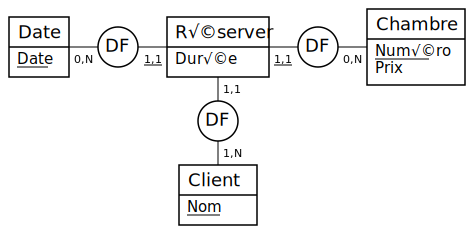

In [31]:
%%mocodo
Date: Date
DF1, 0N Date, _11 R√©server
R√©server: _Dur√©e
DF2, 0N Chambre, _11 R√©server
Chambre: Num√©ro, Prix
  
DF3, 11 R√©server, 1N Client

Client: Nom

Sous Mocodo, l'agr√©gation est trait√©e comme un cas particulier de ce que nous appelons une r√©duction de cl√© primaire. Le m√©canisme est d√©crit [ici](#R%C3%A9duction-de-cl%C3%A9-primaire-(ou-agr%C3%A9gation,-ou-pseudo-entit%C3%A9)).

Rien ne nous emp√™che par exemple de cr√©er un agr√©gat r√©duit √† une seule entit√©¬†:

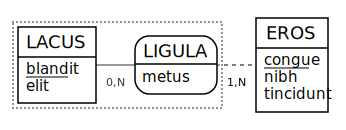

In [32]:
%%mocodo
LACUS: blandit, elit
LIGULA, 0N LACUS, /1N EROS: metus
EROS: congue, nibh, tincidunt

Pour en revenir √† la repr√©sentation graphique¬†:

- Apparaissent en pointill√©s la ou les pattes par lesquelles les identifiants vont migrer **en perdant leur caract√®re identifiant**.
- Une enveloppe de points appara√Æt autour de l'association et des entit√©s de l'agr√©gat dans les cas o√π¬†:
    - il y a au maximum deux entit√©s √† agr√©ger¬†;
    - l'angle form√© par l'association et les entit√©s est plat ou rectangle.

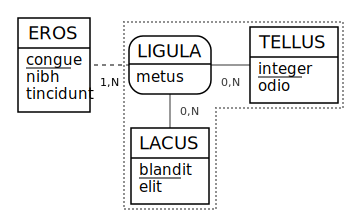

In [33]:
%%mocodo
EROS: congue, nibh, tincidunt
LIGULA, 0N LACUS, /1N EROS, 0N TELLUS: metus
TELLUS: integer, odio

LACUS: blandit, elit

Si ces conditions ne sont pas r√©unies, pour des raisons de simplicit√© du code et de clart√© du diagramme, l'enveloppe n'est pas affich√©e. Cependant, les pointill√©s de la ou des pattes concern√©es subsistent et le reste des traitements est inchang√©.

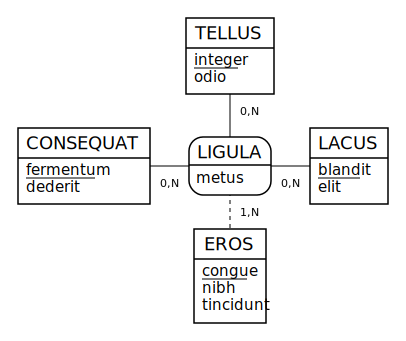

In [34]:
%%mocodo
TELLUS: integer, odio

CONSEQUAT: fermentum, dederit
LIGULA, 0N LACUS, /1N EROS, 0N TELLUS, 0N CONSEQUAT: metus
LACUS: blandit, elit

EROS: congue, nibh, tincidunt

### H√©ritage (ou sp√©cialisation)

#### Introduction

L'h√©ritage permet de regrouper dans une entit√©, dite ¬´¬†m√®re¬†¬ª, les attributs communs √† plusieurs autres entit√©s, dites ¬´¬†filles¬†¬ª, qui se distinguent les unes des autres par des attributs sp√©cifiques.

La syntaxe Mocodo est la suivante¬†:
```
/\ M√®re <- Fille_1, Fille_2, ...¬†: type
```
O√π¬†:
- **M√®re** est une entit√© normale¬†;
- _Fille_1_, _Fille_2_, etc. sont des entit√©s **sans identifiant** (inutile de les pr√©fixer par un tiret bas, il serait ignor√©)¬†;
- le ¬´¬†triangle¬†¬ª d√©finit le type d'h√©ritage, soit `/\`,  soit `/X\`, soit `/T\`, soit `/XT\` (√©ventuellement suffix√© par un chiffre de 0 √† 9, p. ex. `/1\` ou `/XT2\`)¬†;
- la ¬´¬†fl√®che¬†¬ª d√©finit le m√©canisme de passage au relationnel, soit `<=`, soit `<-`, soit `->`, soit `=>`. Reportez-vous √† cette [section](#S%C3%A9mantique-de-la-fl%C3%A8che)¬†;
- le type (facultatif) n'appara√Æt pas sur le MCD, mais √©ventuellement, lors du passage au relationnel, dans la liste des champs de la table-m√®re ou, en cas de suppression de celle-ci, des tables dans lesquelles migre son identifiant. Il permet de pr√©ciser √† laquelle des entit√©s-filles on a affaire.

Voici un exemple¬†:

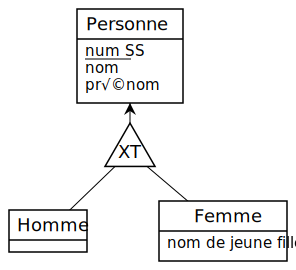

In [35]:
%%mocodo
Personne: num SS, nom, pr√©nom

/XT\ Personne <- Homme, Femme: sexe

Homme: 
:
Femme: nom de jeune fille

#### Les quatre types d'h√©ritage

Selon les symboles inscrits dans le triangle, le MCD pr√©c√©dent s'interpr√©tera ainsi¬†:

| Totalit√© | Exclusion | Symboles | Exemple de population | Toute personne est¬†: |
|----------|-----------|:------:-:|:---------:|:--------|
| oui        | oui         | `/XT\`  | <big>‚ôÇ‚ôÇ‚ôÇ‚ôÇ‚ôÇ‚ôÇ‚ôÇ<br>‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ</big> | - soit un homme<br>- soit une femme |
| non        | oui         | `/X\`   | <big>‚ôÇ‚ôÇ‚ôÇ‚ôÇ‚ôÇ‚ôÇ‚ôÇ‚ôÇ<br>‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ<br>‚ö¨‚ö¨‚ö¨‚ö¨</big> | - soit un homme<br>- soit une femme<br>- soit aucun des deux |
| oui        | non         | `/T\`   | <big>‚ôÇ‚ôÇ‚ôÇ‚ôÇ‚ôÇ‚ôÇ<br>‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ<br>‚ö•‚ö•‚ö•‚ö•</big> | - soit un homme<br>- soit une femme<br>- soit les deux √† la fois |
| non        | non         | `/\`    | <big>‚ôÇ‚ôÇ‚ôÇ‚ôÇ‚ôÇ<br>‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ‚ôÄ<br>‚ö¨‚ö¨‚ö¨‚ö¨<br>‚ö•‚ö•‚ö•‚ö•</big> | - soit un homme<br>- soit une femme<br>- soit aucun des deux<br>- soit les deux √† la fois |

Ces contraintes ne sont pas transposables au niveau relationnel, mais pourront √™tre r√©inject√©es au niveau physique (m√™me si Mocodo ne le fait pas actuellement).

#### Repr√©sentation graphique

Le type de fl√®che sp√©cifiant le m√©canisme de passage au mod√®le relationnel (`<=`, `<-`, `->` ou `=>`) fait par d√©faut l'objet d'une visualisation d√®s le mod√®le conceptuel¬†: la ou les pattes vers les entit√©s de destination des attributs migrants sont orient√©es vers celles-ci¬†; et la ou les autres pattes sont doubl√©es (pour `<=` et `=>`) ou non (pour `<-` et `->`).

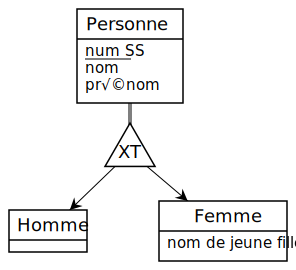

In [36]:
%%mocodo --mld
Personne: num SS, nom, pr√©nom

/XT\ Personne => Homme, Femme: sexe

Homme: 
:
Femme: nom de jeune fille

Cette visualisation n'est pas conventionnelle¬†: par d√©faut, on se borne √† ajouter une fl√®che dirig√©e vers l'entit√©-m√®re. Pour d√©sactiver l'embellissement op√©r√© par Mocodo, sans pour autant changer le m√©canisme de passage au relationnel, r√©p√©tez simplement le deuxi√®me caract√®re de la fl√®che¬†: `<==`, `<--`, `->>` ou `=>>`.

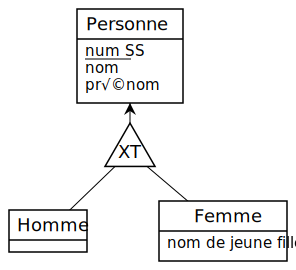

In [37]:
%%mocodo --mld
Personne: num SS, nom, pr√©nom

/XT\ Personne =>> Homme, Femme: sexe

Homme: 
:
Femme: nom de jeune fille

## Besoins sp√©cifiques √† la p√©dagogie

Si vous n'√™tes pas enseignant de bases de donn√©es, vous pouvez [passer directement √† la section suivante](#Trac%C3%A9-d'un-MCD).

### Afficher l'explication des cardinalit√©s

Les d√©butants ont souvent des doutes sur la s√©mantique de telle ou telle cardinalit√©. Cette information peut d√©sormais √™tre incluse dans le texte-source, en annotant les pattes correspondantes, pour appara√Ætre √† la demande lors du rendu (utile pour cr√©er des exercices √† faire en TD ou en autonomie).

Survolez les cardinalit√©s du MCD ci-dessous pour faire appara√Ætre leur description.

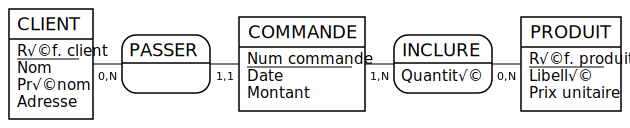

In [38]:
%%mocodo
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
PASSER, 0N [Un client peut passer un nombre quelconque de commandes.] CLIENT, 11 [Toute commande est pass√©e par un en un seul client.] COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N [Une commande peut inclure plusieurs produits distincts, et en inclut au moins un.] COMMANDE, 0N [Certains produits ne sont jamais command√©s, d'autres le sont plusieurs fois.] PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

Les notes s'ins√®rent entre cardinalit√©s et nom de l'entit√©. Elles sont d√©limit√©es par des crochets droits.

Avec l'option `--disambiguation=notes` (par d√©faut), elles sont √©galement exploitables lors du passage au relationnel pour [pr√©ciser la s√©mantique d'une cl√© √©trang√®re](#R%C3%A9tablissement-explicite-de-la-s%C3%A9mantique-des-DF-disparues).

L'affichage est d√©sactiv√© avec l'option `--hide_notes`.

**Limitations.**

- Non pris en charge par les √©diteurs de SVG comme Inkscape.
- Ne semble pas fonctionner dans une page HTML statique (comme la version HTML de ce document sous GitHub).
- N√©cessite de faire confiance √† un notebook (Trust notebook) pour s'afficher √† la r√©ouverture.

### D√©voiler un MCD par √©tapes

**Nouveaut√© de la version 3.** Il est possible de faire appara√Ætre progressivement les diff√©rentes ¬´¬†bo√Ætes¬†¬ª constituant un MCD. Pour cela, il suffit d'indenter (d√©caler vers la droite √† l'aide d'espaces ou de tabulations) au moins une ligne. Les √©l√©ments correspondants seront alors r√©partis sur autant de ¬´¬†calques¬†¬ª qu'il y a de niveaux d'indentations.

Reprenons par exemple le MCD vu en introduction, et dont voici la description du ¬´¬†r√©el per√ßu¬†¬ª¬†:

> 1. Une classe n‚Äôa cours que dans une seule salle.
> 1. Un professeur enseigne une seule mati√®re.
> 1. Une classe a plusieurs professeurs.
> 1. Un professeur fait cours dans plusieurs classes.
> 1. Un professeur peut faire passer des examens oraux dans plusieurs mati√®res.
> 1. Un √©l√®ve peut subir plusieurs examens oraux dans une m√™me mati√®re.
> 1. Tout professeur rel√®ve d‚Äôune cat√©gorie identifi√©e par un code.

L'enseignant peut le pr√©senter pas √† pas en suivant les √©tapes de l'√©nonc√©¬†:

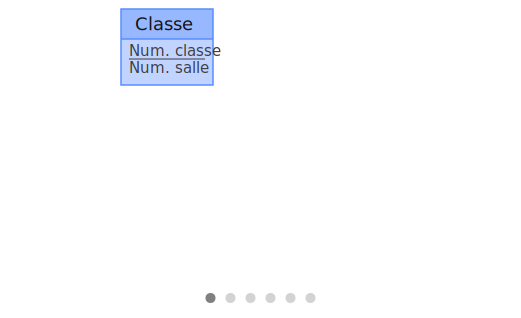

In [39]:
%%mocodo  --colors ocean --shapes copperplate
              DF, 11 √âl√®ve, 1N Classe
Classe: Num. classe, Num. salle
    Faire Cours, 1N Classe, 1N Prof: Vol. horaire
        Cat√©gorie: Code cat√©gorie, Nom cat√©gorie
              
      √âl√®ve: Num. √©l√®ve, Nom √©l√®ve
      Noter, 1N √âl√®ve, 0N Prof, 0N Mati√®re, 1N Date: Note
  Prof: Num. prof, Nom prof
        Relever, 0N Cat√©gorie, 11 Prof
              
      Date: Date
  Mati√®re: Libell√© mati√®re
  Enseigner, 11 Prof, 1N Mati√®re

**Remarques.**
- Pas de r√®gle sur la taille de l'indentation. Pour Mocodo, autant de niveaux d'indentation distincts, autant de calques.
- Pour ajouter facilement de l'interactivit√© √† un MCD existant¬†:
    1. commencez par indenter au maximum toutes les lignes¬†;
    1. effacez l'indentation des lignes du premier calque¬†;
    1. d√©calez votre curseur de $n$ caract√®res vers la droite¬†;
    1. placez-vous tour √† tour sur les lignes √† int√©grer au deuxi√®me calque et effacez les espaces surnum√©raires¬†;
    1. recommencez √† l'√©tape 3 jusqu'au dernier calque.
- Les diff√©rents calques sont cod√©s directement dans le SVG. L'interaction ne n√©cessite donc aucun logiciel sp√©cifique.
- Sous Mocodo online, le MCD est toujours pr√©sent√© enti√®rement d√©voil√©. Cela permet de voir directement le r√©sultat d'une modification du texte-source.

**Limitations actuelles.**
- Pas de granularit√© plus fine que la ligne (entit√© ou association avec toutes ses pattes et cardinalit√©s).
- Pas de prise en charge des touches directionnelles. Cela serait sans doute possible, mais difficilement compatible avec la pr√©sence de plusieurs MCD interactifs sur une m√™me page (comme dans cette documentation).

### Cr√©er une vue en extension

La [technique de duplication](#Cr%C3%A9ation-de-plusieurs-entit%C3%A9s-ou-associations-de-m%C3%AAme-nom) que l'on vient de voir peut servir √† produire une vue en extension d'un MCD. Voici par exemple le MCD que j'utilise en cours pour introduire la notion d'entit√© faible (√† gauche, vue en compr√©hension, √† droite vue en extension):

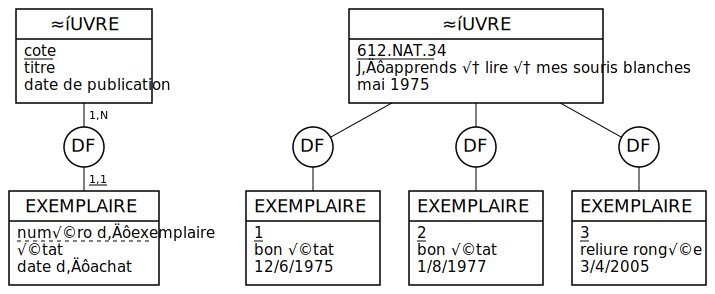

In [40]:
%%mocodo
≈íUVRE1: cote, titre, date de publication
:::
≈íUVRE2: 612.NAT.34, J'apprends √† lire √† mes souris blanches, mai 1975
:
  
DF1, 1N ≈íUVRE1, _11 EXEMPLAIRE1
::
DF2, XX ≈íUVRE2, XX EXEMPLAIRE2
DF3, XX ≈íUVRE2, XX EXEMPLAIRE3
DF4, XX ≈íUVRE2, XX EXEMPLAIRE4

EXEMPLAIRE1: num√©ro d'exemplaire, √©tat, date d'achat
::
EXEMPLAIRE2: 1, bon √©tat, 12/6/1975
EXEMPLAIRE3: 2, bon √©tat, 1/8/1977
EXEMPLAIRE4: 3, reliure rong√©e, 3/4/2005

### Cr√©er un MCD √† compl√©ter

Les MCD √† trous sont des exercices classiques d'introduction aux bases de donn√©es.

#### Supprimer le marquage d'un identifiant

Pour √©viter le marquage automatique du premier attribut d'une entit√© comme identifiant, il suffit de le pr√©fixer par un tiret bas (`_`)¬†: ce caract√®re est donc un commutateur, qui souligne un attribut non soulign√© par d√©faut, et d√©souligne un attribut soulign√© par d√©faut.

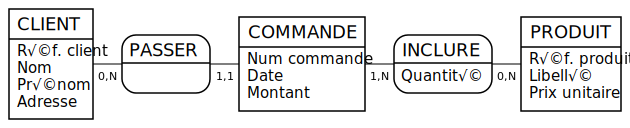

In [41]:
%%mocodo
CLIENT: _R√©f. client, Nom, Pr√©nom, Adresse
PASSER, 0N CLIENT, 11 COMMANDE
COMMANDE: _Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: _R√©f. produit, Libell√©, Prix unitaire

#### Masquer un couple de cardinalit√©s

Vous pouvez masquer n'importe quelles cardinalit√©s en les rempla√ßant pas `XX` (ci-dessous √† gauche)¬†:

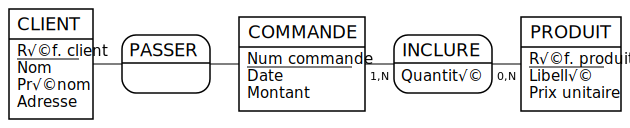

In [42]:
%%mocodo
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
PASSER, XX CLIENT, XX COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

#### Masquer un attribut

Vous pouvez mettre deux virgules cons√©cutives pour r√©server la place d'un attribut manquant.

Les espaces ins√©cables sont pr√©serv√©s, ce qui permet de r√©server plus d'espace horizontal, cf. ci-dessous premier attribut vide de INCLURE.

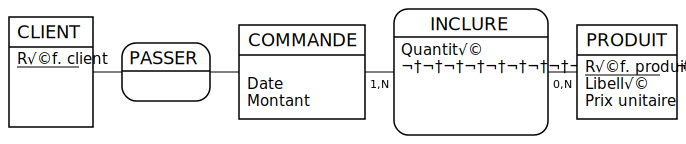

In [43]:
%%mocodo
CLIENT: R√©f. client, , , 
PASSER, XX CLIENT, XX COMMANDE
COMMANDE: , Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©, ¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬† , , ,
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

#### Ne faire appara√Ætre que le squelette du sch√©ma conceptuel

Enfin, vous pouvez transformer en exercice √† trous n'importe quel MCD en rendant compl√®tement transparentes les couleurs des attributs, associations et cardinalit√©s. Le style `blank` a √©t√© pr√©d√©fini √† cet effet:

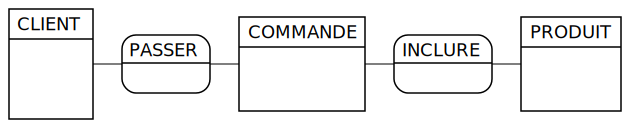

In [44]:
%%mocodo --colors=blank
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
PASSER, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

Attention, n'utilisez pas cette m√©thode si vous souhaitez diffuser l'exercice sous forme √©lectronique: l'information textuelle est toujours pr√©sente, susceptible d'√™tre s√©lectionn√©e et coll√©e ailleurs pour √™tre lue. Vous pouvez bien s√ªr emp√™cher cette possibilit√© en convertissant la figure dans un format bitmap (comme PNG); mais le plus simple est de combiner les deux m√©thodes pr√©c√©dentes:

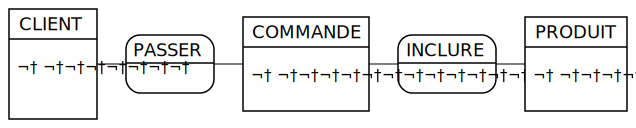

In [45]:
%%mocodo
CLIENT: ,¬†  ¬†¬†¬†¬†¬†¬†¬†,,
PASSER, XX CLIENT, XX COMMANDE
COMMANDE: ,¬†  ¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†¬†,
INCLURE, XX COMMANDE, XX PRODUIT: 
PRODUIT: ,¬†  ¬†¬†¬†¬†¬†¬†¬†¬†¬†,

### Remplacer tous les libell√©s par du faux-texte (obfuscation)

L'obfuscation d'un MCD consiste √† vider celui-ci de sa s√©mantique de surface, en substituant des cha√Ænes al√©atoires √† tous les libell√©s. Le r√©sultat sera par exemple utilis√© pour montrer que les principales r√®gles de passage du sch√©ma conceptuel au sch√©ma relationnel peuvent √™tre appliqu√©es ¬´¬†b√™tement¬†¬ª, c'est-√†-dire sans comprendre le fonctionnement de l'organisme mod√©lis√©.

Ainsi, dans l'exemple ci-dessous, les libell√©s du MCD _CLIENT-COMMANDE-PRODUIT_ sont remplac√©s par des mots tir√©s au hasard:

%%mocodo
PHARETRA: Feugiat, Vitae, Blandit, Integer
NEC, 0N PHARETRA, 11 SCELERISQUE
SCELERISQUE: Tortor, Enim, Cursus
VIVAMUS, 1N SCELERISQUE, 0N ORNARE: Euismod
ORNARE: Est, Faucibus, Maecenas


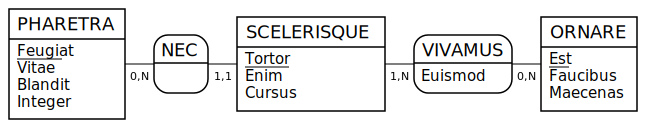

In [46]:
%%mocodo --obfuscate
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
PASSER, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

**Nouveaut√© de la version 2.0.20.** Pour remplacer le texte de la cellule par le r√©sultat de son √©valuation, ajoutez l'[option `--replace`](#Modification-in-situ-d'une-cellule).

En argument, vous pouvez ajouter le chemin d'un fichier texte UTF-8 quelconque o√π puiser les mots de substitution. Par exemple, le texte du `README` de ce projet:

In [47]:
%%mocodo --obfuscate=../README.md --seed=42 --no_mcd
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
PASSER, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

%%mocodo
RENDU: Donn√©es, Mutiplicatifs, Introduit, Une
VOL, 0N RENDU, 11 AIMEZ
AIMEZ: Export√©e, Mcd, Feront
MIEUX, 1N AIMEZ, 0N SEUL: Noter
SEUL: Dictionnaire, √âgalement, √âl√®ve


Mocodo essaie d'abord de trouver ce fichier √† l'endroit indiqu√©. En cas d'√©chec, il le cherche (avec extension `.txt` facultative) parmi les textes distribu√©s avec le logiciel, √† savoir:

- `"lorem_ipsum.txt"`: le [faux-texte](https://fr.wikipedia.org/wiki/Faux-texte) le plus courant.
- `"disparition.txt"`: le lexique du [c√©l√®bre roman lipogrammatique](https://fr.wikipedia.org/wiki/La_Disparition_&#40;roman&#41;) de Georges Perec.
- `"four_letter_words.txt"`: une s√©lection (SFW) de mots anglais de quatre lettres.

En cas de nouvel √©chec, il se rabat sur `"lorem_ipsum.txt"`.

Notez enfin que l'algorithme s'assure que la [distance de Damerau-Levenshtein](https://fr.wikipedia.org/wiki/Distance_de_Damerau-Levenshtein) entre deux libell√©s de substitution quelconques est d'au moins 3 (valeur par d√©faut du param√®tre `obfuscation_min_distance`). En clair, cela signifie que, si vous donnez en examen un exercice de conversion en relationnel bas√© sur un tel MCD, les erreurs de transcription d'un √©tudiant stress√©, inattentif, illettr√©, dyslexique, roublard, ou tout cela √† la fois, ne devraient pas vous emp√™cher de retrouver son intention premi√®re.

**Nouveaut√©s de la version 3.**
- L'option `--obfuscation_max_length` est supprim√©e¬†; inversement, la taille minimale d'un mot de substitution est fix√©e (en dur) √† 3.
- L'option `--seed` est respect√©e quelle que soit la version de Python.

# Trac√© d'un MCD

## Interdiction des chevauchements

Les d√©butants ne comprennent pas toujours du premier coup que l'ordre des lignes du texte-source correspond √† celui des bo√Ætes du MCD affich√©¬†; ou qu'il faut sauter une ligne chaque fois que l'on veut une nouvelle rang√©e de bo√Ætes. Ces malheureux se retrouvent donc plus souvent qu'√† leur tour avec des chevauchements pas forc√©ment faciles √† voir¬†:

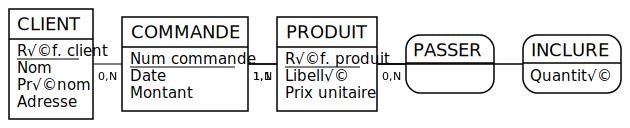

In [48]:
%%mocodo
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
COMMANDE: Num commande, Date, Montant
PRODUIT: R√©f. produit, Libell√©, Prix unitaire
PASSER, 0N CLIENT, 11 COMMANDE
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©

Ci-dessus, par exemple, l'association INCLURE, qui devrait se trouver entre CLIENT et COMMANDE, est d√©port√©e de telle sorte que ses pattes chevauchent COMMANDE, PRODUIT et PASSER, ‚Äî ce qui ne se voit pas vraiment puisque les entit√©s et associations sont trac√©es **apr√®s** les pattes.

**Nouveaut√© de la version 3.0.** Mocodo peut lever une erreur dans une telle situation. L'option correspondante, `--detect_overlaps` est par d√©faut activ√©e sous Mocodo online, et d√©sactiv√©e en ligne de commande.

Si cela se produit, vous pouvez¬†:
    
- Modifier manuellement l'ordre des lignes du texte-source et/ou ins√©rer des sauts de ligne.
- [R√©arranger automatiquement](#R√©arrangement-automatique) le MCD (en cliquant üîÄ sous Mocodo online, ou avec l'option `--arrange` en ligne de commande).
- Ignorer le probl√®me en d√©cochant la d√©tection des chevauchements (sous l'onglet ¬´¬†Options¬†¬ª de Mocodo online).

**Remarques.**

- Les calculs sont op√©r√©s, non pas √† partir des coordonn√©es r√©elles des bo√Ætes, mais de leurs indices $(i, j)$ dans la matrice correspondant √† la grille qui sert de base au plongement. Les √©ventuelles [retouches](#Retouches-fines) apport√©es √† la position de leurs centres sont ignor√©es.
- Seuls les chevauchements mettant en jeu des pattes horizontales ou verticales sont d√©tect√©s. Par exemple, ci-dessous, le chevauchement sera ignor√©.

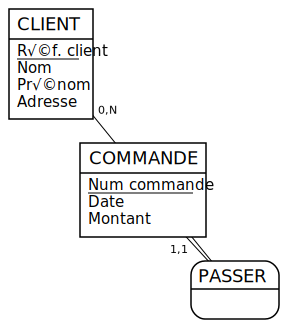

In [49]:
%%mocodo
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
::

:
COMMANDE: Num commande, Date, Montant
:

::
PASSER, 0N CLIENT, 11 COMMANDE

## Insertion manuelle d'espacements

Le trac√© r√©alis√© par Mocodo pour des MCD de plusieurs rang√©es laisse parfois √† d√©sirer¬†:

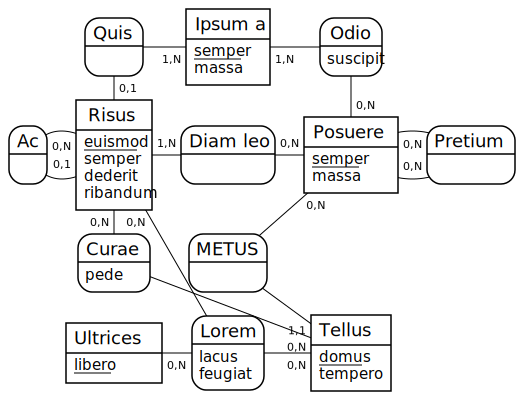

In [50]:
%%mocodo
Quis, 01 Risus, 1N Ipsum a
Ipsum a: semper, massa
Odio, 1N Ipsum a, 0N Posuere: suscipit

Ac, 01 Risus, 0N Risus
Risus: euismod, semper, dederit, ribandum
Diam leo, 1N Risus, 0N Posuere
Posuere: semper, massa
Pretium, 0N Posuere, 0N Posuere

Curae, 0N Risus, 0N Tellus: pede
METUS, 11 Tellus, 0N Posuere

Ultrices: libero
Lorem, 0N Ultrices, 0N Tellus, 0N Risus: lacus, feugiat
Tellus: domus, tempero

On voit que, par d√©faut, Mocodo centre les rang√©es qui contiennent moins de bo√Ætes que les autres. Cela donne un bon r√©sultat pour la premi√®re rang√©e, mais pas pour la troisi√®me.

L'utilisateur peut cependant sp√©cifier les espacements qu'il d√©sire en compl√©tant les rang√©es par des bo√Ætes invisibles dont le seul r√¥le est de ¬´¬†pousser ¬ª les autres √† l'emplacement voulu. Ainsi, il va pr√©ciser que l'association _Curae_ doit commencer sur la troisi√®me colonne en ins√©rant des lignes r√©duites au caract√®re deux-points, et en profiter pour ins√©rer un espace entre _Lorem_ et _Tellus_¬†:

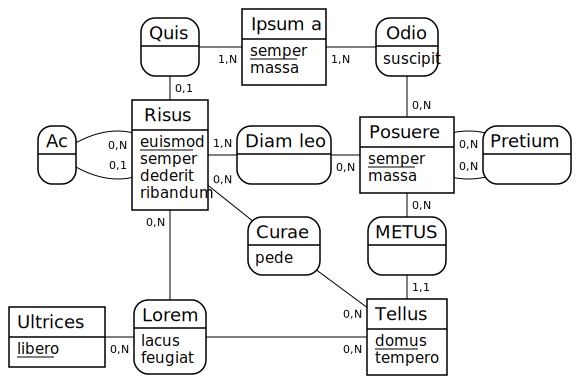

In [51]:
%%mocodo
Quis, 01 Risus, 1N Ipsum a
Ipsum a: semper, massa
Odio, 1N Ipsum a, 0N Posuere: suscipit

Ac, 01 Risus, 0N Risus
Risus: euismod, semper, dederit, ribandum
Diam leo, 1N Risus, 0N Posuere
Posuere: semper, massa
Pretium, 0N Posuere, 0N Posuere

:
:
Curae, 0N Risus, 0N Tellus: pede
METUS, 11 Tellus, 0N Posuere
:

Ultrices: libero
Lorem, 0N Ultrices, 0N Tellus, 0N Risus: lacus, feugiat
:
Tellus: domus, tempero

Il est possible de ¬´¬†compresser ¬ª les suites de deux-points en supprimant les retours-chariots, autrement dit, de remplacer $n$ lignes r√©duites √† deux-points par une ligne r√©duite √† une s√©quence de $n$ deux-points. Ce raccourci est illustr√© dans le prochain exemple.

## Ajustement automatique dans une grille minimale

**Nouveaut√© de la version 2.2.** On cherche en g√©n√©ral √† faire tenir le MCD dans la plus petite grille possible, tout en maintenant un rapport ¬´¬†√©quilibr√©¬†¬ª entre hauteur et largeur. Par exemple, un MCD de 13 bo√Ætes (entit√©s ou associations) peut tenir dans les grilles:

- $13\times1$;
- $7\times2$, ce qui laisse 1 case vide;
- $5\times3$, ce qui laisse 2 cases vides;
- $4\times4$, ce qui laisse 3 cases vides;
- etc.

Les deux premi√®res grilles √©tant non √©quilibr√©es, on retiendra la plus petite des suivantes, de dimensions $5\times3$.

La table ci-dessous √©num√®re les dimensions des grilles minimales d'√©quilibre sup√©rieur √† 0,5 pour tous les MCD comportant moins de 100 bo√Ætes. On peut y v√©rifier par exemple que le MCD de taille 13 se trouve effectivement aux coordonn√©es (5, 3).

|  | **1** | **2** | **3** | **4** | **5** | **6** | **7** | **8** | **9** | **10** | **11** | **12** | **13** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| **1** | 1 | 2 | 3 |  |  |  |  |  |  |  |  |  |  |
| **2** |  | 4 | 5, 6 |  |  |  |  |  |  |  |  |  |  |
| **3** |  |  | 7, 8, 9 | 10, 11, 12 | **13**, 14, 15 |  |  |  |  |  |  |  |  |
| **4** |  |  |  | 16 | 17, 18, 19, 20 | 21, 22, 23, 24 | 26, 27, 28 |  |  |  |  |  |  |
| **5** |  |  |  |  | 25 | 29, 30 | 31, 32, 33, 34, 35 | 37, 38, 39, 40 | 43, 44, 45 |  |  |  |  |
| **6** |  |  |  |  |  | 36 | 41, 42 | 46, 47, 48 | 50, 51, 52, 53, 54 | 57, 58, 59, 60 | 65, 66 |  |  |
| **7** |  |  |  |  |  |  | 49 | 55, 56 | 61, 62, 63 | 67, 68, 69, 70 | 73, 74, 75, 76, 77 | 82, 83, 84 | 91 |
| **8** |  |  |  |  |  |  |  | 64 | 71, 72 | 78, 79, 80 | 85, 86, 87, 88 | 92, 93, 94, 95, 96 |  |
| **9** |  |  |  |  |  |  |  |  | 81 | 89, 90 | 97, 98, 99 |  |  |
| **10** |  |  |  |  |  |  |  |  |  | 100 |  |  |  |

**Nouveaut√© de la version 3.0.** La contrainte d'√©quilibre est relax√©e pour les MCD √† 2 et 3 bo√Ætes, qui sont plac√©es respectivement sur des grilles $2\times1$ et $3\times1$ au lieu de $2\times2$.

Avec l'option `--fit`, Mocodo reformate automatiquement le MCD pour le faire entrer dans la grille minimale correspondante:

In [52]:
%%mocodo --fit
Lacus, 01 Blandit, 1N Elit
Elit: ligula, tellus
Metus, 1N Elit, 0N Congue: nibh
  
Bibendum, 01 Blandit, 0N Blandit
Blandit: consequat, ligula, nibh, consequat
Ipsum, 1N Blandit, 0N Congue

Congue: ligula, tellus
Augue, 0N Congue, 0N Congue
Velit, 0N Blandit, 0N Nonummy: sollicitudin
  
DF, 11 Nonummy, 0N Congue
Posuere: pede
Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis
  
Nonummy: consequat, ligula

%%mocodo
Lacus, 01 Blandit, 1N Elit
Elit: ligula, tellus
Metus, 1N Elit, 0N Congue: nibh
Bibendum, 01 Blandit, 0N Blandit
Blandit: consequat, ligula, nibh, consequat

Ipsum, 1N Blandit, 0N Congue
Congue: ligula, tellus
Augue, 0N Congue, 0N Congue
Velit, 0N Blandit, 0N Nonummy: sollicitudin
DF, 11 Nonummy, 0N Congue

Posuere: pede
Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis
Nonummy: consequat, ligula
:
:


L'algorithme se contente de supprimer ou d'ins√©rer des sauts de ligne dans le texte-source, sans modifier l'ordre des clauses. On devra donc encore en g√©n√©ral op√©rer sur le r√©sultat un r√©arrangement automatique ([voir plus loin](#R%C3%A9arrangement-automatique)).

%%mocodo
Bibendum, 01 Blandit, 0N Blandit
Blandit: consequat, ligula, nibh, consequat
Lacus, 01 Blandit, 1N Elit
Elit: ligula, tellus
:

Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis
Velit, 0N Blandit, 0N Nonummy: sollicitudin
Ipsum, 1N Blandit, 0N Congue
Metus, 1N Elit, 0N Congue: nibh
:

Posuere: pede
Nonummy: consequat, ligula
DF, 11 Nonummy, 0N Congue
Congue: ligula, tellus
Augue, 0N Congue, 0N Congue


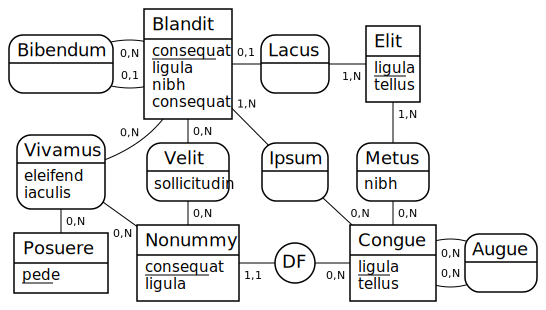

In [53]:
%%mocodo --arrange
Lacus, 01 Blandit, 1N Elit
Elit: ligula, tellus
Metus, 1N Elit, 0N Congue: nibh
Bibendum, 01 Blandit, 0N Blandit
Blandit: consequat, ligula, nibh, consequat

Ipsum, 1N Blandit, 0N Congue
Congue: ligula, tellus
Augue, 0N Congue, 0N Congue
Velit, 0N Blandit, 0N Nonummy: sollicitudin
DF, 11 Nonummy, 0N Congue

Posuere: pede
Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis
Nonummy: consequat, ligula
::

Si ce r√©arrangement √©choue ou laisse √† d√©sirer, il est possible de sp√©cifier chacune des i√®mes grilles suivantes avec l'option `--fit=i`:

In [54]:
%%mocodo --fit=1
Lacus, 01 Blandit, 1N Elit
Elit: ligula, tellus
Metus, 1N Elit, 0N Congue: nibh
  
Bibendum, 01 Blandit, 0N Blandit
Blandit: consequat, ligula, nibh, consequat
Ipsum, 1N Blandit, 0N Congue

Congue: ligula, tellus
Augue, 0N Congue, 0N Congue
Velit, 0N Blandit, 0N Nonummy: sollicitudin
  
DF, 11 Nonummy, 0N Congue
Posuere: pede
Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis
  
Nonummy: consequat, ligula

%%mocodo
Lacus, 01 Blandit, 1N Elit
Elit: ligula, tellus
Metus, 1N Elit, 0N Congue: nibh
Bibendum, 01 Blandit, 0N Blandit

Blandit: consequat, ligula, nibh, consequat
Ipsum, 1N Blandit, 0N Congue
Congue: ligula, tellus
Augue, 0N Congue, 0N Congue

Velit, 0N Blandit, 0N Nonummy: sollicitudin
DF, 11 Nonummy, 0N Congue
Posuere: pede
Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis

Nonummy: consequat, ligula
:
:
:


%%mocodo
Metus, 1N Elit, 0N Congue: nibh
Elit: ligula, tellus
Lacus, 01 Blandit, 1N Elit
:

Congue: ligula, tellus
Ipsum, 1N Blandit, 0N Congue
Blandit: consequat, ligula, nibh, consequat
Bibendum, 01 Blandit, 0N Blandit

Augue, 0N Congue, 0N Congue
DF, 11 Nonummy, 0N Congue
Velit, 0N Blandit, 0N Nonummy: sollicitudin
Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis

:
:
Nonummy: consequat, ligula
Posuere: pede


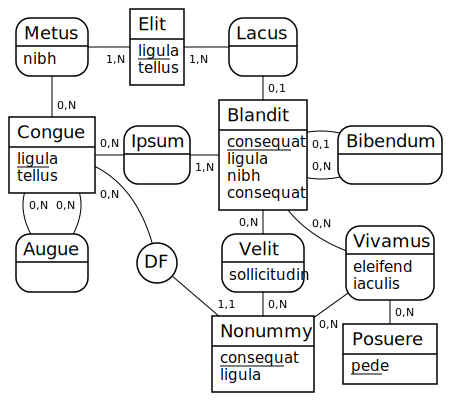

In [55]:
%%mocodo --arrange --seed=4
Lacus, 01 Blandit, 1N Elit
Elit: ligula, tellus
Metus, 1N Elit, 0N Congue: nibh
Bibendum, 01 Blandit, 0N Blandit

Blandit: consequat, ligula, nibh, consequat
Ipsum, 1N Blandit, 0N Congue
Congue: ligula, tellus
Augue, 0N Congue, 0N Congue

Velit, 0N Blandit, 0N Nonummy: sollicitudin
DF, 11 Nonummy, 0N Congue
Posuere: pede
Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis

Nonummy: consequat, ligula
:::

**Remarques.**
- Quand le param√®tre de `--fit` d√©finit une grille trop grande, le r√©arrangement automatique retombe fr√©quemment sur une sous-grille de celle-ci.
- Dans [Mocodo online](http://mocodo.net), cliquer sur le bouton de r√©arrangement automatique avec <kbd>alt</kbd> (ou <kbd>option</kbd> sur Mac) encha√Æne directement les op√©rations `--fit=0` et `--arrange=bb`. Dans la plupart des cas, cela permet d'obtenir le meilleur r√©sultat. Mais il peut √©galement arriver que la grille minimale soit trop √©troite pour autoriser un plongement planaire. Dans ce cas,  cliquez sans <kbd>alt</kbd> pour d√©brayer la premi√®re op√©ration.

## Basculement des cardinalit√©s et inflexion des pattes rectilignes

**Nouveaut√© de la version 2.1.** Mocodo est capable de d√©tecter certaines configurations de pattes dont les cardinalit√©s pr√©sentent un risque √©lev√© de collision. Il proc√®de alors √† deux types d'ajustements:

1. [Issue 25](https://github.com/laowantong/mocodo/issues/25). Les cardinalit√©s d'une patte verticale ou horizontale sont envoy√©es de l'autre c√¥t√© de la patte. Par exemple, dans le plongement du MCD pr√©c√©dent, la pr√©sence de la patte oblique _BLANDIT-VIVAMUS_ envoie les cardinalit√©s de _VELIT-BLANDIT_ √† l'oppos√© de leur position par d√©faut (√† droite d'une patte verticale ou en bas d'une patte horizontale).
2. [Issue 27](https://github.com/laowantong/mocodo/issues/27). Les pattes obliques sont infl√©chies de fa√ßon √† m√©nager plus d'espace pour afficher deux couples de cardinalit√©s. Ici, l'inflexion de la patte _DF-CONGUE_ permet √† ses cardinalit√©s de coexister sans probl√®me avec celles de l'association r√©flexive.

Ces ajustements automatiques r√©solvent les probl√®mes les plus courants. Toutefois, √©tant ant√©rieurs au trac√© proprement dit, ils peuvent seulement r√©duire les risques de collision, et non les pr√©venir totalement. Ils peuvent m√™me en produire d'autres. Ainsi, autour des entit√©s particuli√®rement pattues, des collisions qui ne se seraient pas produites par d√©faut seront parfois observ√©es. L'utilisateur a alors deux possibilit√©s:

- modifier √† la main les coordonn√©es des cardinalit√©s en conflit, comme expliqu√© dans la section suivante;
- diminuer la valeur du param√®tre `--flex` (par d√©faut, `0.75`) pour r√©duire la courbure de l'inflexion automatique, en allant jusqu'√† `0` pour la d√©sactiver totalement ([exemple](#Sym%C3%A9tries-selon-les-diagonales-(transposition))).

## Retouches fines

### Par modification du fichier  de g√©om√©trie

Lors du plongement, Mocodo g√©n√®re syst√©matiquement un fichier (intitul√© par d√©faut `sandbox_geo.json`) r√©pertoriant les positions les plus importantes du dessin. La plupart des autres coordonn√©es sont calcul√©es relativement √† celles-ci.

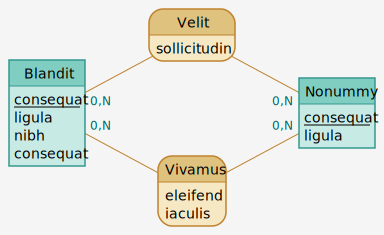

In [56]:
%%mocodo --shapes trebuchet --colors=brewer+1
Velit, 0N Blandit, 0N Nonummy: sollicitudin

Blandit: consequat, ligula, nibh, consequat
:::
Nonummy: consequat, ligula
  
Vivamus, 0N Nonummy, 0N Blandit: eleifend, iaculis

Si on ouvre le fichier de g√©om√©trie g√©n√©r√©, on y retrouvera les principaux param√®tres de position:

In [57]:
display.Code("mocodo_notebook/sandbox_geo.json")

{
  "width": 384,
  "height": 235,
  "cx": [
    [ "Velit", 192 ],
    [ "Blandit", 47 ],
    [ "Nonummy", 337 ],
    [ "Vivamus", 192 ]
  ],
  "cy": [
    [ "Velit", 35 ],
    [ "Blandit", 113 ],
    [ "Nonummy", 113 ],
    [ "Vivamus", 191 ]
  ],
  "shift": [
    [ "Velit,Blandit,0", 0 ],
    [ "Velit,Nonummy,0", 0 ],
    [ "Vivamus,Nonummy,0", 0 ],
    [ "Vivamus,Blandit,0", 0 ]
  ],
  "ratio": []
}

- Un couple de dimensions `width` et `height` d√©finit la taille du MCD¬†;
- deux listes de couples `cx` et `cy`, les abscisses et ordonn√©es des centres des bo√Ætes¬†;
- un dictionnaire `shift`, les positions relatives des cardinalit√©s par rapport √† leur position par d√©faut¬†;
- une liste `ratio`, les positions des fl√®ches √©ventuelles.

Pour rendre le plongement plus compact, nous apportons √† ce fichier quelques modifications¬†:

In [58]:
%%file mocodo_notebook/sandbox_geo.json
{
  "width": 384,
  "height": 155,
  "cx": [
    [ "Velit", 192 ],
    [ "Blandit", 47 ],
    [ "Nonummy", 337 ],
    [ "Vivamus", 192 ]
  ],
  "cy": [
    [ "Velit", 35 ],
    [ "Blandit", 73 ],
    [ "Nonummy", 73 ],
    [ "Vivamus", 111 ]
  ],
  "shift": [
    [ "Velit,Blandit,0", -30 ],
    [ "Velit,Nonummy,0", -30 ],
    [ "Vivamus,Nonummy,0", -30 ],
    [ "Vivamus,Blandit,0", -30 ]
  ],
  "ratio": []
}

Overwriting mocodo_notebook/sandbox_geo.json


Il suffit maintenant d'ajouter l'option `--reuse_geo` pour appliquer ces modifications¬†:

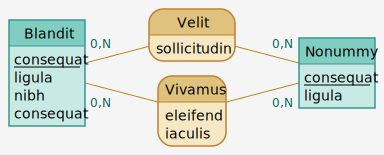

In [59]:
%%mocodo --shapes trebuchet --colors=brewer+1 --reuse_geo
Velit, 0N Blandit, 0N Nonummy: sollicitudin

Blandit: consequat, ligula, nibh, consequat
:::
Nonummy: consequat, ligula
  
Vivamus, 0N Nonummy, 0N Blandit: eleifend, iaculis

### Par √©dition de la sortie au format SVG

Tous les navigateurs modernes prennent en charge la visualisation des SVG. Pour aller au-del√†, il faudra faire appel √† un logiciel de dessin vectoriel d√©di√©, comme [Inkscape](https://www.inkscape.org/?lang=fr) (libre) ou Adobe Illustrator, Freehand, CorelDRAW, etc.
Les √©l√©ments du fichier SVG produit pourront alors √™tre repositionn√©s √† la souris. Certains sont group√©s pour permettre leur d√©placement en bloc. Dans la version actuelle, les liens ne suivent pas ces d√©placements, ce qui peut obliger √† des manipulations suppl√©mentaires.

## R√©arrangement par sym√©trie

Mocodo permet de calculer facilement le sym√©trique d'un MCD, par exemple celui donn√© ci-dessous:

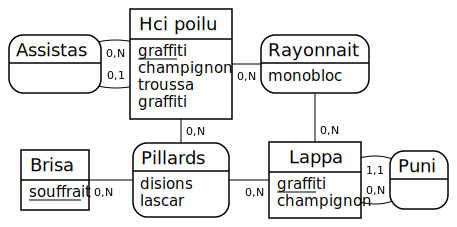

In [60]:
%%mocodo
Assistas, 01 Hci poilu, 0N Hci poilu
Hci poilu: graffiti, champignon, troussa, graffiti
Rayonnait, 0N Hci poilu, 0N Lappa: monobloc

Brisa: souffrait
Pillards, 0N Brisa, 0N Lappa, 0N Hci poilu: disions, lascar
Lappa: graffiti, champignon
Puni, 11 Lappa, 0N Lappa

**Nouveaut√© de la version 2.0.20.** Pour remplacer le texte de la cellule par le r√©sultat de son √©valuation, ajoutez l'[option `--replace`](#Modification-in-situ-d'une-cellule).

### Sym√©trie selon l'axe vertical

%%mocodo
:
Rayonnait, 0N Hci poilu, 0N Lappa: monobloc
Hci poilu: graffiti, champignon, troussa, graffiti
Assistas, 01 Hci poilu, 0N Hci poilu

Puni, 11 Lappa, 0N Lappa
Lappa: graffiti, champignon
Pillards, 0N Brisa, 0N Lappa, 0N Hci poilu: disions, lascar
Brisa: souffrait


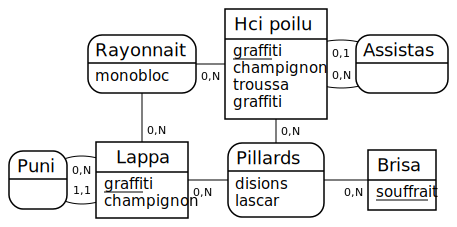

In [61]:
%%mocodo --flip=v
Assistas, 01 Hci poilu, 0N Hci poilu
Hci poilu: graffiti, champignon, troussa, graffiti
Rayonnait, 0N Hci poilu, 0N Lappa: monobloc

Brisa: souffrait
Pillards, 0N Brisa, 0N Lappa, 0N Hci poilu: disions, lascar
Lappa: graffiti, champignon
Puni, 11 Lappa, 0N Lappa

### Sym√©trie selon l'axe horizontal

%%mocodo
Brisa: souffrait
Pillards, 0N Brisa, 0N Lappa, 0N Hci poilu: disions, lascar
Lappa: graffiti, champignon
Puni, 11 Lappa, 0N Lappa

Assistas, 01 Hci poilu, 0N Hci poilu
Hci poilu: graffiti, champignon, troussa, graffiti
Rayonnait, 0N Hci poilu, 0N Lappa: monobloc
:


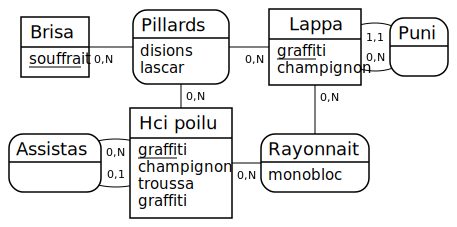

In [62]:
%%mocodo --flip=h
Assistas, 01 Hci poilu, 0N Hci poilu
Hci poilu: graffiti, champignon, troussa, graffiti
Rayonnait, 0N Hci poilu, 0N Lappa: monobloc

Brisa: souffrait
Pillards, 0N Brisa, 0N Lappa, 0N Hci poilu: disions, lascar
Lappa: graffiti, champignon
Puni, 11 Lappa, 0N Lappa

### Sym√©tries selon les diagonales (transposition)

%%mocodo
Assistas, 01 Hci poilu, 0N Hci poilu
Brisa: souffrait

Hci poilu: graffiti, champignon, troussa, graffiti
Pillards, 0N Brisa, 0N Lappa, 0N Hci poilu: disions, lascar

Rayonnait, 0N Hci poilu, 0N Lappa: monobloc
Lappa: graffiti, champignon

:
Puni, 11 Lappa, 0N Lappa


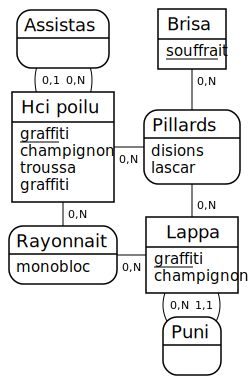

In [63]:
%%mocodo --flip=d
Assistas, 01 Hci poilu, 0N Hci poilu
Hci poilu: graffiti, champignon, troussa, graffiti
Rayonnait, 0N Hci poilu, 0N Lappa: monobloc

Brisa: souffrait
Pillards, 0N Brisa, 0N Lappa, 0N Hci poilu: disions, lascar
Lappa: graffiti, champignon
Puni, 11 Lappa, 0N Lappa

Pour une sym√©trie selon l'anti-diagonale, appliquer successivement les trois sym√©tries pr√©c√©dentes dans n'importe quel ordre.

### Astuce: √©dition rapide d'une ou plusieurs colonnes

La transposition peut √™tre utilis√©e pour r√©aliser plus facilement certaines op√©rations d'√©dition en colonne, en particulier sous [Mocodo online](http://mocodo.net). Par exemple, supposons que l'on souhaite d√©caler vers le haut la derni√®re colonne du MCD ci-dessous:

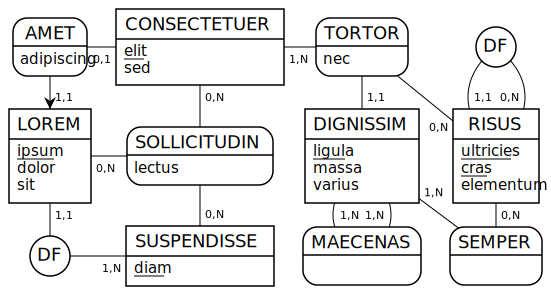

In [64]:
%%mocodo --flex=0
AMET, 11> LOREM, 01 CONSECTETUER: adipiscing
CONSECTETUER: elit, sed
TORTOR, 0N RISUS, 11 DIGNISSIM, 1N CONSECTETUER: nec
DF, 11 RISUS, 0N RISUS

LOREM: ipsum, dolor, sit
SOLLICITUDIN, 0N SUSPENDISSE, 0N CONSECTETUER, 0N LOREM: lectus
DIGNISSIM: ligula, massa, varius
RISUS: ultricies, _cras, elementum

DF1, 11 LOREM, 1N SUSPENDISSE
SUSPENDISSE: diam
MAECENAS, 1N DIGNISSIM, 1N DIGNISSIM
SEMPER, 0N RISUS, 1N DIGNISSIM

On commence par transposer:

In [65]:
%%mocodo --no_mcd --flip=d
AMET, 11> LOREM, 01 CONSECTETUER: adipiscing
CONSECTETUER: elit, sed
TORTOR, 0N RISUS, 11 DIGNISSIM, 1N CONSECTETUER: nec
DF, 11 RISUS, 0N RISUS

LOREM: ipsum, dolor, sit
SOLLICITUDIN, 0N SUSPENDISSE, 0N CONSECTETUER, 0N LOREM: lectus
DIGNISSIM: ligula, massa, varius
RISUS: ultricies, _cras, elementum

DF1, 11 LOREM, 1N SUSPENDISSE
SUSPENDISSE: diam
MAECENAS, 1N DIGNISSIM, 1N DIGNISSIM
SEMPER, 0N RISUS, 1N DIGNISSIM

%%mocodo
AMET, 11> LOREM, 01 CONSECTETUER: adipiscing
LOREM: ipsum, dolor, sit
DF1, 11 LOREM, 1N SUSPENDISSE

CONSECTETUER: elit, sed
SOLLICITUDIN, 0N SUSPENDISSE, 0N CONSECTETUER, 0N LOREM: lectus
SUSPENDISSE: diam

TORTOR, 0N RISUS, 11 DIGNISSIM, 1N CONSECTETUER: nec
DIGNISSIM: ligula, massa, varius
MAECENAS, 1N DIGNISSIM, 1N DIGNISSIM

DF, 11 RISUS, 0N RISUS
RISUS: ultricies, _cras, elementum
SEMPER, 0N RISUS, 1N DIGNISSIM


Il suffit alors d'ins√©rer un deux-points au d√©but de chacune des trois premi√®res rang√©es, puis de retransposer dans l'autre sens:

%%mocodo
:
:
:
DF, 11 RISUS, 0N RISUS

AMET, 11> LOREM, 01 CONSECTETUER: adipiscing
CONSECTETUER: elit, sed
TORTOR, 0N RISUS, 11 DIGNISSIM, 1N CONSECTETUER: nec
RISUS: ultricies, _cras, elementum

LOREM: ipsum, dolor, sit
SOLLICITUDIN, 0N SUSPENDISSE, 0N CONSECTETUER, 0N LOREM: lectus
DIGNISSIM: ligula, massa, varius
SEMPER, 0N RISUS, 1N DIGNISSIM

DF1, 11 LOREM, 1N SUSPENDISSE
SUSPENDISSE: diam
MAECENAS, 1N DIGNISSIM, 1N DIGNISSIM
:


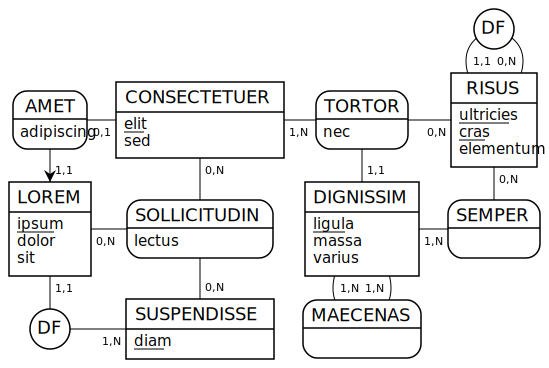

In [66]:
%%mocodo --flip=d
:
AMET, 11> LOREM, 01 CONSECTETUER: adipiscing
LOREM: ipsum, dolor, sit
DF1, 11 LOREM, 1N SUSPENDISSE

:
CONSECTETUER: elit, sed
SOLLICITUDIN, 0N SUSPENDISSE, 0N CONSECTETUER, 0N LOREM: lectus
SUSPENDISSE: diam

:
TORTOR, 0N RISUS, 11 DIGNISSIM, 1N CONSECTETUER: nec
DIGNISSIM: ligula, massa, varius
MAECENAS, 1N DIGNISSIM, 1N DIGNISSIM

DF, 11 RISUS, 0N RISUS
RISUS: ultricies, _cras, elementum
SEMPER, 0N RISUS, 1N DIGNISSIM


On peut se convaincre en examinant le nouveau texte d'entr√©e que le r√©sultat aurait √©t√© beaucoup plus p√©nible √† obtenir en proc√©dant directement.

## R√©arrangement automatique

Il est possible de demander √† Mocodo de chercher tout seul une ¬´¬†bonne¬†¬ª permutation des bo√Ætes, ce qui √† la main deviendrait vite difficile.

Le crit√®re que nous avons retenu pour √©valuer la qualit√© d'une permutation est double:

1. les liens ne doivent pas se couper¬†;
2. leur longueur cumul√©e doit √™tre minimale.

Deux algorithmes sont fournis¬†:

- un algorithme exact (`bb`, pour _Branch & Bound_), qui ne trouve que des solutions satisfaisant au premier crit√®re;
- un algorithme approch√© (`ga`, pour _Genetic Algorithm_), r√©serv√© aux cas o√π il est impossible d'y satisfaire. L'algorithme va alors chercher des solutions o√π les liens se coupent seulement le moins possible.

**Nouveaut√© de la version 2.0.20.** Pour remplacer le texte de la cellule par le r√©sultat de son √©valuation, ajoutez l'[option `--replace`](#Modification-in-situ-d'une-cellule).

### M√©thode exacte sp√©cialis√©e

#### √Ä l'int√©rieur d'une grille pr√©d√©finie

Voici √† titre d'exemple un r√©sultat trouv√© par l'algorithme exact, suivi du MCD correspondant:

%%mocodo
Nonummy: consequat, ligula
Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis
Posuere: pede
:

DF, 11 Nonummy, 0N Congue
Velit, 0N Blandit, 0N Nonummy: sollicitudin
Blandit: consequat, ligula, nibh, consequat
Bibendum, 01 Blandit, 0N Blandit

Congue: ligula, tellus
Ipsum, 1N Blandit, 0N Congue
Lacus, 01 Blandit, 1N Elit
:

Augue, 0N Congue, 0N Congue
Metus, 1N Elit, 0N Congue: nibh
Elit: ligula, tellus
:


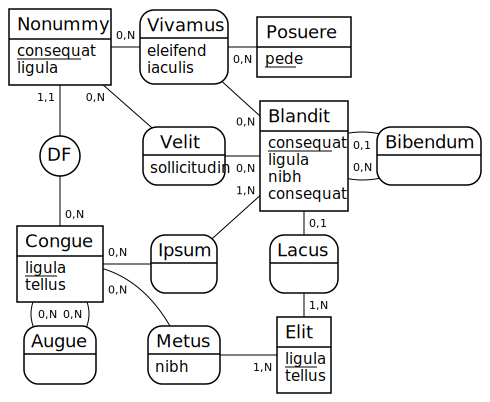

In [67]:
%%mocodo --arrange --seed=1
Lacus, 01 Blandit, 1N Elit
Elit: ligula, tellus
Metus, 1N Elit, 0N Congue: nibh

Bibendum, 01 Blandit, 0N Blandit
Blandit: consequat, ligula, nibh, consequat
Ipsum, 1N Blandit, 0N Congue
Congue: ligula, tellus
Augue, 0N Congue, 0N Congue

Velit, 0N Blandit, 0N Nonummy: sollicitudin
DF, 11 Nonummy, 0N Congue

Posuere: pede
Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis
Nonummy: consequat, ligula

Le r√©arrangement automatique se fera toujours √† l'int√©rieur d'une grille ayant autant de colonnes et de rang√©es que le texte de d√©part (ici, $4\times5$). On peut quelquefois essayer de r√©duire cette grille. Par exemple, le MCD ci-dessus comporte 13 bo√Ætes. Celles-ci pourraient donc th√©oriquement tenir dans une grille $5\times3=15$. Modifions le texte √† la main pour avoir 3 blocs d'au plus 5 lignes, et v√©rifier qu'un tel r√©arrangement est possible:

%%mocodo
Augue, 0N Congue, 0N Congue
Congue: ligula, tellus
DF, 11 Nonummy, 0N Congue
Nonummy: consequat, ligula
Posuere: pede

:
Metus, 1N Elit, 0N Congue: nibh
Ipsum, 1N Blandit, 0N Congue
Velit, 0N Blandit, 0N Nonummy: sollicitudin
Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis

:
Elit: ligula, tellus
Lacus, 01 Blandit, 1N Elit
Blandit: consequat, ligula, nibh, consequat
Bibendum, 01 Blandit, 0N Blandit


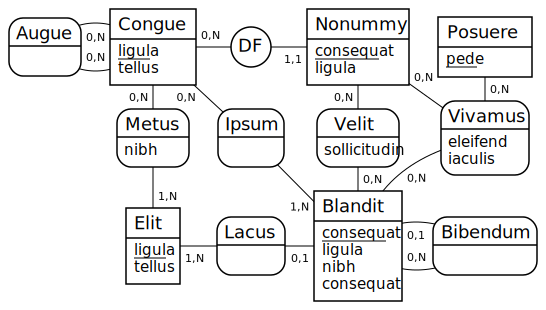

In [68]:
%%mocodo --arrange --seed=4
Lacus, 01 Blandit, 1N Elit
Elit: ligula, tellus
Metus, 1N Elit, 0N Congue: nibh
Bibendum, 01 Blandit, 0N Blandit
Blandit: consequat, ligula, nibh, consequat

Ipsum, 1N Blandit, 0N Congue
Congue: ligula, tellus
Augue, 0N Congue, 0N Congue
Velit, 0N Blandit, 0N Nonummy: sollicitudin
DF, 11 Nonummy, 0N Congue

Posuere: pede
Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis
Nonummy: consequat, ligula

#### Par croissance organique

Le r√©arrangement dit organique consiste √† choisir une premi√®re bo√Æte au hasard, puis √† essayer d'agr√©ger les autres sans se pr√©occuper de contenir le tout dans une grille pr√©d√©termin√©e.

%%mocodo
:
Bibendum, 01 Blandit, 0N Blandit
:
:

Lacus, 01 Blandit, 1N Elit
Blandit: consequat, ligula, nibh, consequat
Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis
Posuere: pede

Elit: ligula, tellus
Ipsum, 1N Blandit, 0N Congue
Velit, 0N Blandit, 0N Nonummy: sollicitudin
Nonummy: consequat, ligula

Metus, 1N Elit, 0N Congue: nibh
Congue: ligula, tellus
DF, 11 Nonummy, 0N Congue
:

:
Augue, 0N Congue, 0N Congue
:
:


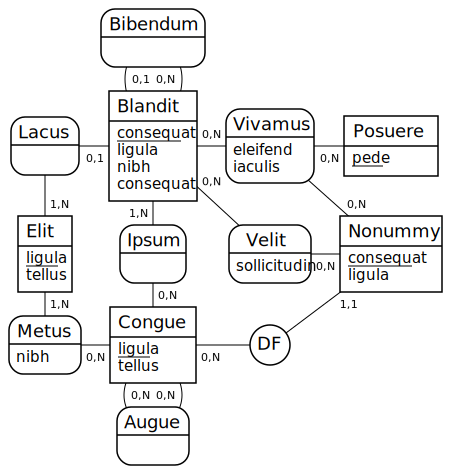

In [69]:
%%mocodo --arrange --organic --seed=7
Lacus, 01 Blandit, 1N Elit
Elit: ligula, tellus
Metus, 1N Elit, 0N Congue: nibh
Bibendum, 01 Blandit, 0N Blandit
Blandit: consequat, ligula, nibh, consequat

Ipsum, 1N Blandit, 0N Congue
Congue: ligula, tellus
Augue, 0N Congue, 0N Congue
Velit, 0N Blandit, 0N Nonummy: sollicitudin
DF, 11 Nonummy, 0N Congue

Posuere: pede
Vivamus, 0N Posuere, 0N Nonummy, 0N Blandit: eleifend, iaculis
Nonummy: consequat, ligula

Cela donne un autre plongement du MCD sur une grille $4\times5$, ce qui comme on l'a vu n'est pas optimal. Mais on voit aussi qu'il peut √™tre trivialement am√©lior√©. De fait, le r√©arrangement organique fournit souvent un bon point de d√©part pour chercher soi-m√™me une permutation plus esth√©tique ou mettant en √©vidence certaines propri√©t√©s du MCD.

 #### Limitations

Pour permettre au programme de rendre plus rapidement de bonnes solutions, on a born√© arbitrairement le nombre d'appels √† la fonction charg√©e de construire une permutation √† partir du placement de la premi√®re bo√Æte. De ce fait, l'algorithme n'est plus exact, en ce sens que la meilleure solution peut occasionnellement lui √©chapper. Si vous soup√ßonnez que c'est le cas, faites un autre essai, √©ventuellement en augmentant la borne (par d√©faut 10000):
```shell
mocodo --arrange --call_limit=100000
```

D'autre part, le r√©arrangement exact ne fonctionnera jamais sur les MCD:
  
- non planaires;
- planaires n'admettant aucun plongement planaire dans les limites de la grille sp√©cifi√©e.

Rappelons qu'un graphe est dit [planaire](https://fr.wikipedia.org/wiki/Graphe_planaire) lorsqu'il en existe au moins un arrangement sans croisement. Le graphe non planaire comportant le plus petit nombre de liens est connu sous le nom de [$K_{3,3}$](http://www.nomachetejuggling.com/2011/10/29/why-the-complete-bipartite-graph-k33-is-not-planar/):

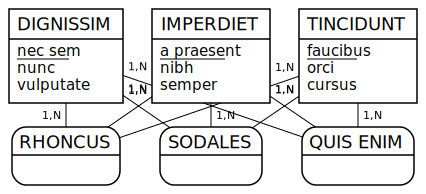

In [70]:
%%mocodo
DIGNISSIM: nec sem, nunc, vulputate
IMPERDIET: a praesent, nibh, semper
TINCIDUNT: faucibus, orci, cursus

RHONCUS, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
SODALES, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
QUIS ENIM, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT

Son r√©arrangement par _Branch & bound_ √©chouera donc n√©cessairement. Mocodo ne cherche pas √† savoir si la non-planarit√© est intrins√®que au graphe, ou r√©sulte des dimensions de la grille impos√©e pour le plongement¬†:

In [71]:
%%mocodo --arrange
DIGNISSIM: nec sem, nunc, vulputate
IMPERDIET: a praesent, nibh, semper
TINCIDUNT: faucibus, orci, cursus

RHONCUS, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
SODALES, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
QUIS ENIM, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT

Mocodo Err.9 - Impossible de calculer une mise en page planaire sur la grille impartie.

### M√©thode heuristique

Dans tous ces cas, on pourra se rabattre sur l'heuristique. Celle-ci, au lieu d'interdire les croisements, cherche simplement √† en minimiser le nombre.

%%mocodo
DIGNISSIM: nec sem, nunc, vulputate
RHONCUS, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
IMPERDIET: a praesent, nibh, semper

SODALES, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
TINCIDUNT: faucibus, orci, cursus
QUIS ENIM, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT


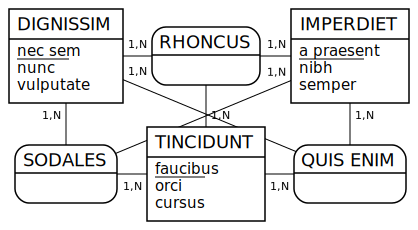

In [72]:
%%mocodo --arrange=ga --seed=42
DIGNISSIM: nec sem, nunc, vulputate
IMPERDIET: a praesent, nibh, semper
TINCIDUNT: faucibus, orci, cursus

RHONCUS, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
SODALES, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
QUIS ENIM, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT

L'am√©lioration ne saute pas forc√©ment aux yeux, mais il n'y a plus que 3 croisements au lieu de 9. Ce plongement constitue en tout cas un bon point de d√©part pour un r√©arrangement manuel. Pour arriver √† une repr√©sentation lisible, il ne reste plus qu'√† ins√©rer quelques bo√Ætes invisibles:

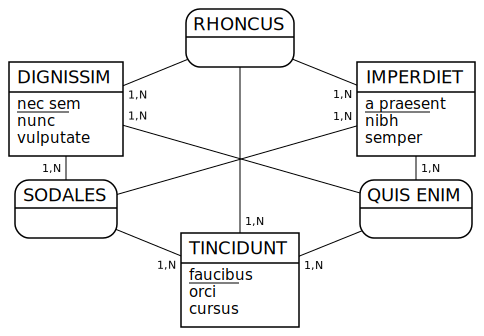

In [73]:
%%mocodo
RHONCUS, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT

DIGNISSIM: nec sem, nunc, vulputate
:::
IMPERDIET: a praesent, nibh, semper

SODALES, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT
:::
QUIS ENIM, 1N DIGNISSIM, 1N IMPERDIET, 1N TINCIDUNT

TINCIDUNT: faucibus, orci, cursus

## Conversion dans d'autres formats graphiques

Mocodo g√©n√®re syst√©matiquement une sortie au format SVG¬†:

In [74]:
%%mocodo --no_mcd --png --pdf
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
PASSER, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

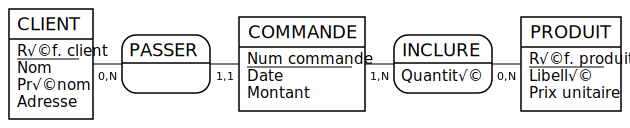

In [75]:
display.SVG("mocodo_notebook/sandbox.svg")

**Nouveaut√© de la version 3.0.** Avec les options `--pdf` et `--png` (ou en cochant les cases correspondantes dans l'onglet Options de la version web), Mocodo convertit d√©sormais ce SVG en PDF et PNG. Le premier format est id√©al pour l'inclusion dans des documents destin√©s √† √™tre projet√©s, diffus√©s ou imprim√©s¬†:

In [76]:
display.IFrame("mocodo_notebook/sandbox.pdf", width="100%", height="100%")

Le second est un format bitmap, donc avec une certaine perte de qualit√©¬†:

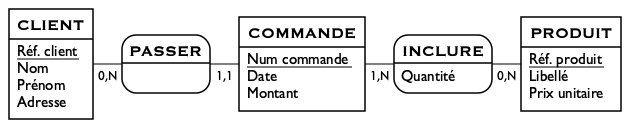

In [77]:
display.Image("mocodo_notebook/sandbox.png")

# Passage au relationnel

Le passage au relationnel se fait en deux √©tapes:
- la cr√©ation d'une repr√©sentation **interne** compl√®te du MLD;
- la traduction de celle-ci en une repr√©sentation **externe** dans le ou les formats de sortie souhait√©s.

## Construction de la repr√©sentation interne

L'algorithme de base r√©alise la s√©quence d'op√©rations suivante¬†:

1. Pour chaque entit√©, une relation (table) de m√™me nom et de m√™mes attributs est cr√©√©e. Le ou les identifiants de l'entit√© constituent la cl√© primaire de la relation.
2. Toute relation issue d'une entit√© faible est renforc√©e, c'est-√†-dire que la cl√© primaire de l'entit√© qu'elle d√©termine fonctionnellement vient s'adjoindre √† sa cl√© primaire, au besoin de fa√ßon r√©cursive.
3. Les associations sont trait√©es ainsi:
  1. si toutes les pattes de l'association portent la cardinalit√© maximale N, une relation de m√™me nom et de m√™mes attributs est cr√©√©e. Sa cl√© primaire est constitu√©e de l'ensemble des cl√©s primaires des relations issues des entit√©s mises en jeu;
  2. dans le cas contraire, c'est-√†-dire si l'une des pattes de l'association porte la cardinalit√© (1,1), ou √† d√©faut (0,1), l'entit√© distingu√©e se voit adjoindre:
    1. en tant que cl√©s √©trang√®res, l'ensemble des cl√©s primaires des autres entit√©s mises en jeu;
    2. en tant que simples attributs, l'ensemble des attributs de l'association.

**Remarque.** Un couple de cardinalit√©s non standard, c'est-√†-dire distinct de (0,1), (1,1), (0,N) et (1,N), est trait√© comme (0,1) si son deuxi√®me symbole est un 1, et comme (0,N) sinon. Cela couvre en particulier les cas (\*, 1), (\*,N), (?,?) et (X,X).

### Traitement des associations non DF

Illustrons le premier cas du troisi√®me point sur un MCD comportant des associations triple, double et r√©flexive dont toutes les cardinalit√©s maximales sont √† N.

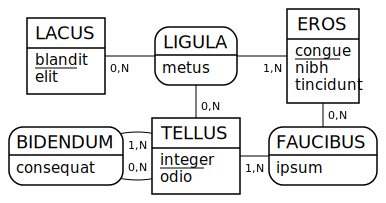

In [78]:
%%mocodo --mld
LACUS: blandit, elit
LIGULA, 0N LACUS, 1N EROS, 0N TELLUS: metus
EROS: congue, nibh, tincidunt  

BIDENDUM, 0N TELLUS, 1N TELLUS: consequat
TELLUS: integer, odio
FAUCIBUS, 1N TELLUS, 0N EROS: ipsum

Notez la [d√©sambigu√Øsation automatique par num√©rotation](#disambiguation_by_number) du deuxi√®me attribut de BIBENDUM.

### Traitement des associations DF

Illustrons l'autre cas sur un MCD quasiment identique, √† ceci pr√®s que certaines cardinalit√©s maximales ont √©t√© ramen√©es √† 1. En tant que d√©pendances fonctionnelles, toutes les associations vont alors dispara√Ætre.

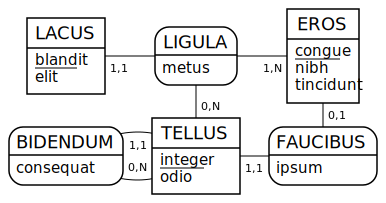

In [79]:
%%mocodo --mld
LACUS: blandit, elit
LIGULA, 11 LACUS, 1N EROS, 0N TELLUS: metus
EROS: congue, nibh, tincidunt  

BIDENDUM, 0N TELLUS, 11 TELLUS: consequat
TELLUS: integer, odio
FAUCIBUS, 11 TELLUS, 01 EROS: ipsum

Notez les points suivants:
- la cardinalit√© (1,1) est par d√©faut prioritaire sur (0,1) lors du traitement de l'association FAUCIBUS;
- Mocodo n'impose pas de borne sup√©rieure √† l'arit√© d'une association de d√©pendance fonctionnelle, ici par exemple LIGULA est ternaire (alternative: mod√©lisation par plusieurs d√©pendances fonctionnelles);
- Mocodo n'interdit pas √† une association de d√©pendance fonctionnelle de porter des attributs (alternative: les mettre dans l'entit√© distingu√©e par (1,1)).

Les deux alternatives mentionn√©es, plus orthodoxes mais plus lourdes, produisent de toute fa√ßon le m√™me sch√©ma relationnel.

Autre point litigieux: dans les d√©pendances fonctionnelles √† double sens ((1,1) des deux c√¥t√©s), la priorit√© est donn√©e √† la premi√®re des entit√©s √©num√©r√©es dans l'association. M√™me chose quand deux (0,1) sont en concurrence.

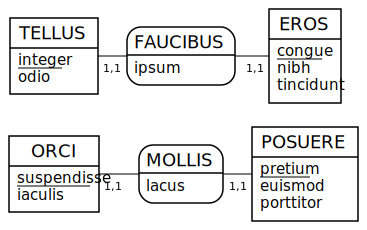

In [80]:
%%mocodo --mld
TELLUS: integer, odio
FAUCIBUS, 11 TELLUS, 11 EROS: ipsum
EROS: congue, nibh, tincidunt  

ORCI: suspendisse, iaculis
MOLLIS, 11 POSUERE, 11 ORCI: lacus
POSUERE: pretium, euismod, porttitor

Les traitements alternatifs (migration dans les deux sens, fusion en une seule table, etc.)  ne sont pas pris en charge par Mocodo.

### Traitement des entit√©s faibles (identification relative)

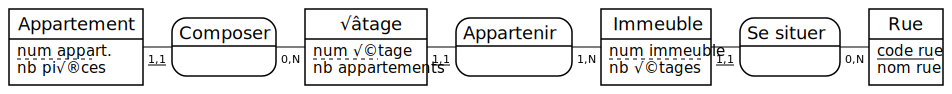

In [81]:
%%mocodo --mld --relations diagram
Appartement: num appart., nb pi√®ces
Composer, 0N √âtage, _11 Appartement
√âtage: num √©tage, nb appartements
Appartenir, 1N Immeuble, _11 √âtage
Immeuble: num immeuble, nb √©tages
Se situer, 0N Rue, _11 Immeuble
Rue: code rue, nom rue

Dans ce joli exemple d√ª √† Idris NEUMANN, [_Initiation √† la conception de bases de donn√©es relationnelles avec MERISE_](http://ineumann.developpez.com/tutoriels/merise/initiation-merise/#LIV-A), les renforcements successifs aboutissent √† faire entrer l'identifiant de RUE dans celui de APPARTEMENT, alors m√™me que ces entit√©s sont s√©par√©es par non moins de trois associations.

Ce processus appara√Æt clairement sur le [diagramme relationnel](#Diagramme-relationnel) g√©n√©r√© par la commande pr√©c√©dente:

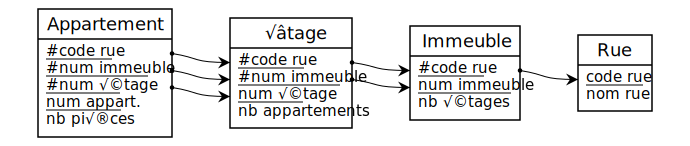

In [82]:
%mocodo --input mocodo_notebook/sandbox.mld

Les renforcements en cascade sont correctement g√©r√©s dans tous les cas, et les renforcements cycliques produisent un message d'erreur.

### R√©tablissement explicite de la s√©mantique des DF disparues

Mocodo permet de modifier l√©g√®rement le nom d'une cl√© √©trang√®re, de fa√ßon √† r√©introduire la s√©mantique perdue lors de la disparition de l'association de d√©pendance fonctionnelle par laquelle elle a migr√©.

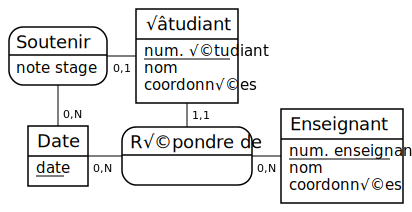

In [83]:
%%mocodo --mld
Soutenir, 01 √âtudiant, 0N Date: note stage
√âtudiant: num. √©tudiant, nom, coordonn√©es

Date: date
R√©pondre de, 0N Date, 11 √âtudiant, 0N Enseignant
Enseignant: num. enseignant, nom, coordonn√©es

Par exemple, ci-dessus, la conversion en relationnel produit dans la relation √âTUDIANT des cl√©s √©trang√®res _date_ et _date.1_ qui ne peuvent √™tre laiss√©es en l'√©tat. Par ailleurs, on peut souhaiter expliciter la raison pour laquelle un num√©ro d'enseignant appara√Æt dans la table √âTUDIANT.

Dans les deux cas, il suffit d'employer le syst√®me d'annotation de pattes introduit [plus haut](#Afficher-l'explication-des-cardinalit%C3%A9s):

In [84]:
%%mocodo --mld --no_mcd
Soutenir, 01 √âtudiant, 0N [soutenance] Date: note stage
√âtudiant: num. √©tudiant, nom, coordonn√©es

Date: date
R√©pondre de, 0N [visite] Date, 11 √âtudiant, 0N [responsable] Enseignant
Enseignant: num. enseignant, nom, coordonn√©es

De fa√ßon moins cruciale, la technique s'applique aussi aux autres types d'association:

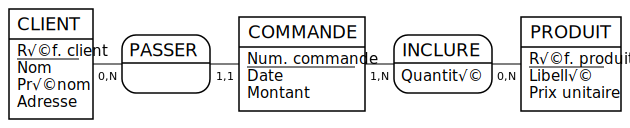

In [85]:
%%mocodo --mld
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
PASSER, 0N [ayant command√©] CLIENT, 11 [note ignor√©e] COMMANDE
COMMANDE: Num. commande, Date, Montant
INCLURE, 1N [pass√©e] COMMANDE, 0N [command√©] PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

Pour d√©sactiver cette fonctionnalit√© (notamment dans le cas o√π vous annotez chaque cardinalit√© d'une explication destin√©e aux novices), passez l'option `--disambiguation=numbers_only`.

### Conversion forc√©e d'une association DF en table

Le traitement r√©gulier d'une association DF (pr√©sence d'une cardinalit√© (1,1) ou, √† d√©faut, (0,1)) ne la convertit pas en table. On a cependant la possibilit√© de forcer cette conversion en mettant entre crochets droits le nom de l'association.

Par exemple, supposons une cardinalit√© (0,1) dans laquelle le 0 est grand devant le 1 en termes de fr√©quence d'apparition¬†: par d√©faut, la plupart des occurrences de la cl√© √©trang√®re ainsi constitu√©e restent vides. Forcer la cr√©ation d'une table d√©di√©e permettra d'√©conomiser de l'espace de stockage.

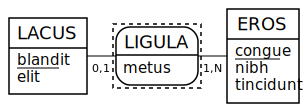

In [86]:
%%mocodo --relations html_verbose
LACUS: blandit, elit
[LIGULA], 01 LACUS, 1N EROS: metus
EROS: congue, nibh, tincidunt

In [87]:
display.HTML("mocodo_notebook/sandbox_verbose.html")

Cliquez sur LIGULA ci-dessus pour voir mentionner le fait que la cr√©ation de la table a √©t√© forc√©e manuellement.

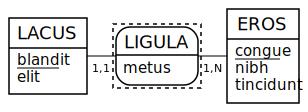

In [88]:
%%mocodo --relations html_verbose
LACUS: blandit, elit
[LIGULA], 11 LACUS, 1N EROS: metus
EROS: congue, nibh, tincidunt

In [89]:
display.HTML("mocodo_notebook/sandbox_verbose.html")

La nouvelle notation fonctionne quelles que soient les cardinalit√©s de l'association. Si cette derni√®re devait d√©j√† donner lieu √† la cr√©ation d'une table, l'indication est visualis√©e, mais ignor√©e lors du passage au relationnel.

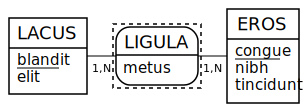

In [90]:
%%mocodo --relations html_verbose
LACUS: blandit, elit
[LIGULA], 1N LACUS, 1N EROS: metus
EROS: congue, nibh, tincidunt

In [91]:
display.HTML("mocodo_notebook/sandbox_verbose.html")

**Limitation.** Cette conversion forc√©e ne fonctionne pas sur les associations nomm√©es ¬´¬†DF¬†¬ª.

### R√©duction de cl√© primaire (ou agr√©gation, ou pseudo-entit√©)

Il arrive qu'un sous-ensemble strict de l'ensemble des identifiants des entit√©s mises en jeu dans une association dont toutes les pattes portent la cardinalit√© N, suffise √† constituer la cl√© primaire de la table issue de cette association¬†: cela se fait facilement au niveau relationnel en privant de leur caract√®re identifiant les cl√©s qui n'appartiennent pas √† ce sous-ensemble.

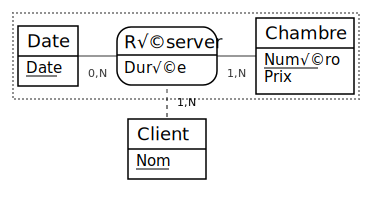

In [92]:
%%mocodo --mld
Date: Date
R√©server, /1N Client, 1N Chambre, 0N Date: Dur√©e
Chambre: Num√©ro, Prix

Client: Nom

C'est plus ou moins √©quivalent √† la notion traditionnelle d'agr√©gation ou pseudo-entit√©. Le traitement se g√©n√©ralise naturellement aux agr√©gats r√©duits √† une seule entit√©¬†:

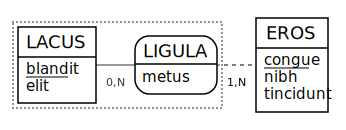

In [93]:
%%mocodo --mld
LACUS: blandit, elit
LIGULA, 0N LACUS, /1N EROS: metus
EROS: congue, nibh, tincidunt

### Traitement de l'h√©ritage

#### S√©mantique de la fl√®che

- Le sens de la fl√®che d√©termine si la migration d'attributs se fait de la m√®re vers les filles (`>`) ou l'inverse (`<`).
- Son √©paisseur d√©termine si la migration est ¬´¬†minimale¬†¬ª (`-`) ou ¬´¬†maximale¬†¬ª (`=`).

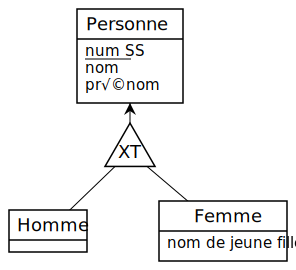

In [94]:
%%mocodo --mld
Personne: num SS, nom, pr√©nom

/XT\ Personne <- Homme, Femme: sexe

Homme: 
:
Femme: nom de jeune fille

Ci-dessus, le passage au relationnel produit une seule table¬†:
- _num SS_ est l'identifiant¬†;
- _nom_ et _pr√©nom_ sont des champs communs √† toutes les occurrences¬†;
- _sexe_ permet de pr√©ciser si une ligne donn√©e correspond √† un homme et/ou une femme. Si le type d'h√©ritage est total et exclusif, un bool√©en ¬´¬†non nullable¬†¬ª (`NOT NULL` en SQL) fera l'affaire¬†; s'il n'y a pas totalit√©, certaines personnes ne sont ni homme, ni femme, et ce bool√©en est ¬´¬†nullable¬†¬ª¬†; s'il n'y a pas exclusion, certaines personnes peuvent √™tre √† la fois homme et femme, et dans ce cas on peut choisir de coder le type par un entier que l'on interpr√©tera en binaire.
- _nom de jeune fille_ est un attribut sp√©cifique aux femmes. Notez qu'il peut √™tre nul, non seulement pour les occurrences ¬´¬†non femmes¬†¬ª, mais aussi pour les occurrences ¬´¬†femmes¬†¬ª c√©libataires. Cela montrer l'int√©r√™t de disposer d'un champ _sexe_ s√©par√©.

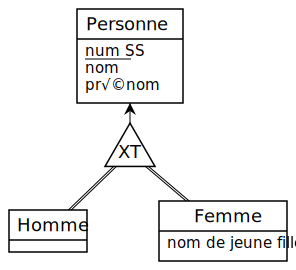

In [95]:
%%mocodo --mld
Personne: num SS, nom, pr√©nom

/XT\ Personne <= Homme, Femme: sexe

Homme: 
:
Femme: nom de jeune fille

Ci-dessus, on a doubl√© la fl√®che pour r√©aliser une migration ¬´¬†maximale¬†¬ª des entit√©s-filles vers l'entit√©-m√®re. Notez le doublement des pattes qui distinguent les entit√©s-filles. Deux nouveaux champs sont apparus¬†: _Homme_ et _Femme_, cens√©s √™tre de type bool√©en. Selon le type d'h√©ritage, ils sont ici plus ou moins redondants avec _sexe_ (si c'est `/XT\`, _sexe_ est pr√©f√©rable, mais si c'est `/\`, _sexe_ peut √™tre supprim√©).

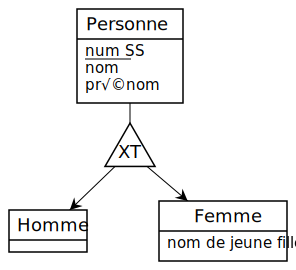

In [96]:
%%mocodo --mld
Personne: num SS, nom, pr√©nom

/XT\ Personne -> Homme, Femme: sexe

Homme: 
:
Femme: nom de jeune fille

Ci-dessus, on a r√©alis√© une migration ¬´¬†minimale¬†¬ª de la m√®re vers les filles. Notez l'inversion du sens des fl√®ches sur le sch√©ma conceptuel.

- Une table _Personne_ accueille les attributs communs. Notez la pr√©sence du champ _sexe_.
- Une table _Femme_ compl√®te ces informations par l'attribut sp√©cifique _nom de jeune fille_.
- La table _Homme_, r√©duite √† sa cl√© primaire, a √©t√© supprim√©e.

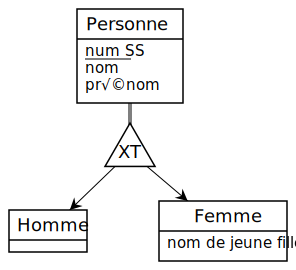

In [97]:
%%mocodo --mld
Personne: num SS, nom, pr√©nom

/XT\ Personne => Homme, Femme: sexe

Homme: 
:
Femme: nom de jeune fille

Avec une migration ¬´¬†maximale¬†¬ª vers les entit√©s-filles, les attributs communs sont ¬´¬†d√©plac√©s¬†¬ª dans chacune des tables-filles. Aucune table-m√®re n'est cr√©√©e.

Cela n'est possible que si l'h√©ritage est total (`/T\` ou `/XT\`)¬†; dans le cas contraire, certaines occurrences (celles qui ne sont ni homme, ni femme) seraient perdues. Mocodo l√®ve alors une erreur¬†:

In [98]:
%%mocodo --mld
Personne: num SS, nom, pr√©nom

/X\ Personne => Homme, Femme: sexe

Homme: 
:
Femme: nom de jeune fille

Mocodo Err.25 - La totalit√© (/T\ or /XT\) est requise pour d√©finir l'h√©ritage ¬´ => ¬ª sur
l'entit√©-m√®re ¬´¬†Personne¬†¬ª.

#### H√©ritage et associations externes

Trois des quatre m√©canismes de passage au relationnel d√©crits ci-dessus conduisent √† la disparition d'entit√©s. Pour assurer que les jointures restent possibles, il faut alors veiller √† ¬´¬†recoller¬†¬ª les r√©f√©rences qui transitaient par ces entit√©s. On se donne ci-dessous un MCD o√π les entit√©s d'un h√©ritage sont associ√©es de fa√ßon diverses √† des entit√©s externes, et on √©tudie les tables et le diagramme relationnel produits selon le m√©canisme de passage au relationnel demand√©.

**Aide.** Cliquez sur le nom des tables pour lire les explications d√©taill√©es. Survolez le libell√© des attributs pour afficher leur cat√©gorie attribu√©e en interne par Mocodo (√† des fins de d√©bogage).

Voici un √©ventail de cas possibles pour le m√©canisme de migration `<-` vers une entit√©-m√®re, avec disparition des entit√©s-filles (le cas `<=`, essentiellement identique, n'est pas donn√©).

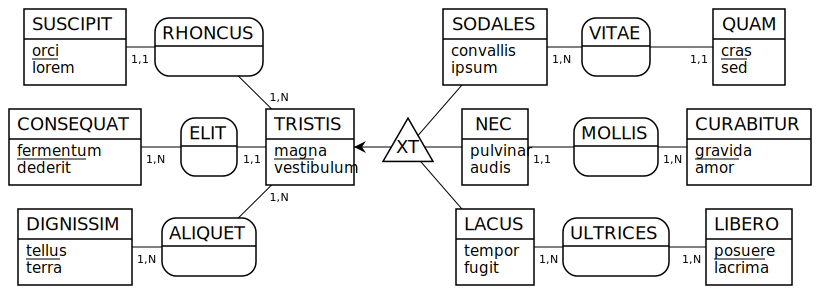

In [99]:
%%mocodo --relations diagram html_verbose
SUSCIPIT: orci, lorem
RHONCUS, 1N TRISTIS, 11 SUSCIPIT
:
:
SODALES: convallis, ipsum
VITAE, 11 QUAM, 1N SODALES
QUAM: cras, sed

CONSEQUAT: fermentum, dederit
ELIT, 11 TRISTIS, 1N CONSEQUAT
TRISTIS: magna, vestibulum
/XT\ TRISTIS <- SODALES, NEC, LACUS: type
NEC: pulvinar, audis
MOLLIS, 1N CURABITUR, 11 NEC
CURABITUR: gravida, amor

DIGNISSIM: tellus, terra
ALIQUET, 1N TRISTIS, 1N DIGNISSIM
:
:
LACUS: tempor, fugit
ULTRICES, 1N LIBERO, 1N LACUS
LIBERO: posuere, lacrima

In [100]:
display.HTML("mocodo_notebook/sandbox_verbose.html")

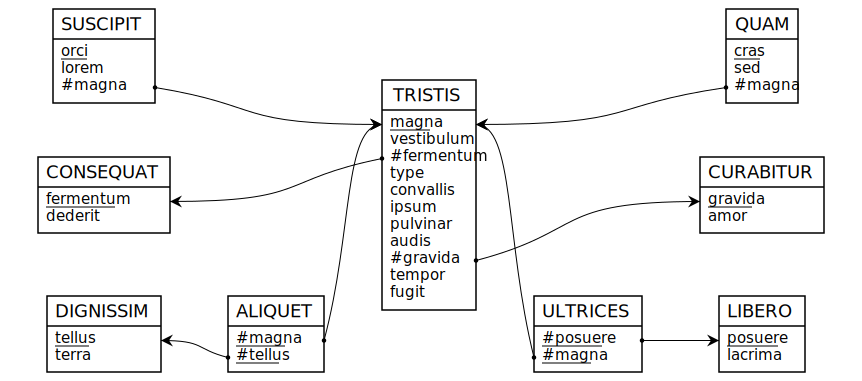

In [101]:
%mocodo --input mocodo_notebook/sandbox.mld

C'est la partie droite de ce diagramme relationnel qui est int√©ressante. Notez que la disparition des entit√©s-filles n'emp√™che pas de lier _Quam_, _Curabitur_ et _Ultrices_ √† la table-m√®re _Tristis_.

Changeons maintenant le sens de la fl√®che¬†:

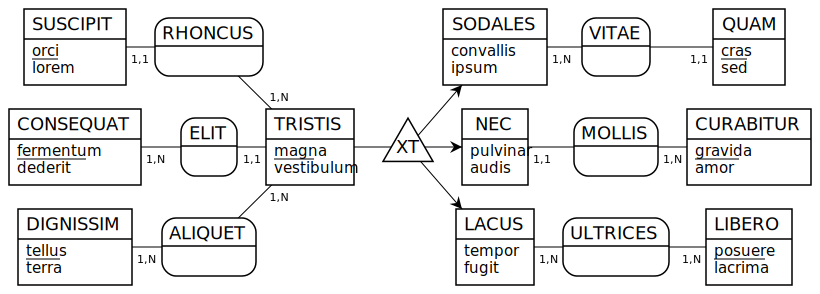

In [102]:
%%mocodo --relations diagram html_verbose
SUSCIPIT: orci, lorem
RHONCUS, 1N TRISTIS, 11 SUSCIPIT
:
:
SODALES: convallis, ipsum
VITAE, 11 QUAM, 1N SODALES
QUAM: cras, sed

CONSEQUAT: fermentum, dederit
ELIT, 11 TRISTIS, 1N CONSEQUAT
TRISTIS: magna, vestibulum
/XT\ TRISTIS -> SODALES, NEC, LACUS: type
NEC: pulvinar, audis
MOLLIS, 1N CURABITUR, 11 NEC
CURABITUR: gravida, amor

DIGNISSIM: tellus, terra
ALIQUET, 1N TRISTIS, 1N DIGNISSIM
:
:
LACUS: tempor, fugit
ULTRICES, 1N LIBERO, 1N LACUS
LIBERO: posuere, lacrima

In [103]:
display.HTML("mocodo_notebook/sandbox_verbose.html")

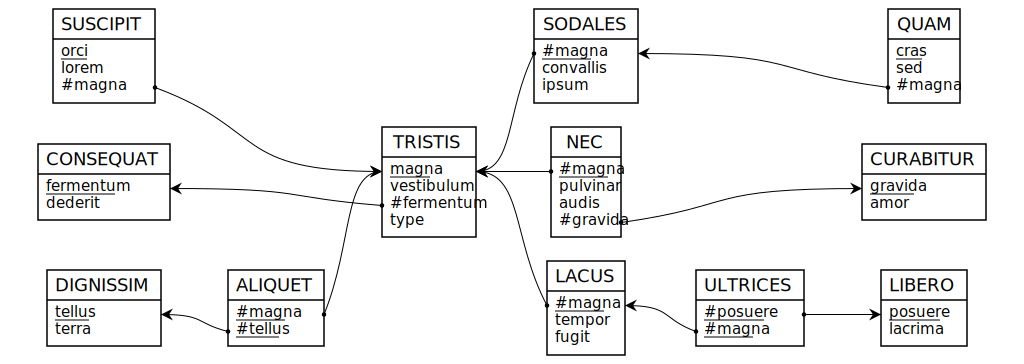

In [104]:
%mocodo --input mocodo_notebook/sandbox.mld

Ce cas est facile, puisque toutes les entit√©s ont donn√© lieu √† la cr√©ation d'une table.

C'est plus compliqu√© si l'on demande une migration ¬´¬†maximale¬†¬ª vers les entit√©s-filles (avec disparition de l'entit√©-m√®re)¬†:

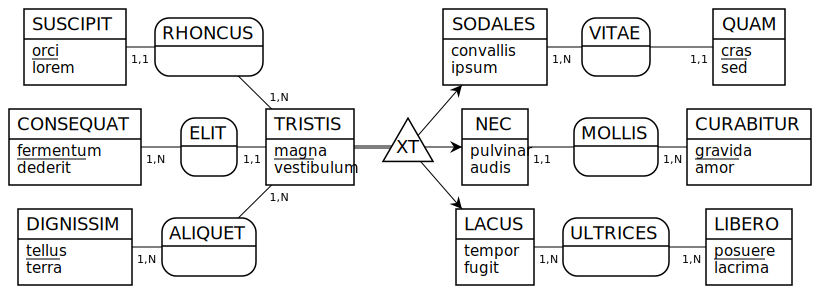

In [105]:
%%mocodo --relations diagram html_verbose
SUSCIPIT: orci, lorem
RHONCUS, 1N TRISTIS, 11 SUSCIPIT
:
:
SODALES: convallis, ipsum
VITAE, 11 QUAM, 1N SODALES
QUAM: cras, sed

CONSEQUAT: fermentum, dederit
ELIT, 11 TRISTIS, 1N CONSEQUAT
TRISTIS: magna, vestibulum
/XT\ TRISTIS => SODALES, NEC, LACUS: type
NEC: pulvinar, audis
MOLLIS, 1N CURABITUR, 11 NEC
CURABITUR: gravida, amor

DIGNISSIM: tellus, terra
ALIQUET, 1N TRISTIS, 1N DIGNISSIM
:
:
LACUS: tempor, fugit
ULTRICES, 1N LIBERO, 1N LACUS
LIBERO: posuere, lacrima

In [106]:
display.HTML("mocodo_notebook/sandbox_verbose.html")

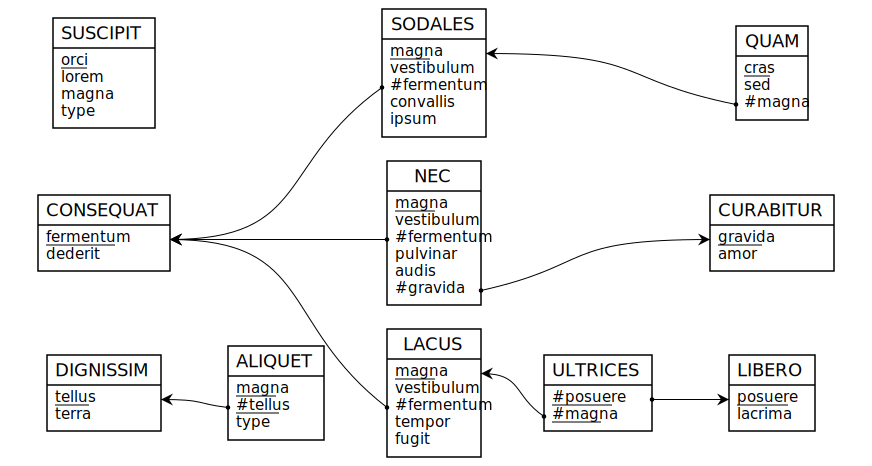

In [107]:
%mocodo --input mocodo_notebook/sandbox.mld

On remarque que la cl√© √©trang√®re _fermentum_ est correctement reproduite dans les tables-filles, mais que les tables _Suscipit_ et _Aliquet_ ne sont plus li√©es au reste du MCD. L'int√©grit√© r√©f√©rentielle du champ _magna_ n'est plus assur√©e. Notez cependant que le champ _type_ d√©fini avec l'h√©ritage migre jusque dans ces tables. Ainsi, _type_ permet de savoir si la valeur de _magna_ dans une occurrence de _Suscipit_ r√©f√®re √† une occurrence de _Sodales_, de _Nec_ ou de _Lacus_.

#### H√©ritage et associations internes

On passe maintenant en revue, sans commentaire, le traitement des diff√©rentes forme d'h√©ritage lorsque des associations lient l'entit√©-m√®re et les entit√©s-filles.

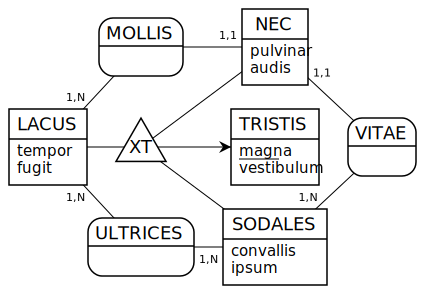

In [108]:
%%mocodo --relations diagram html_verbose
:
MOLLIS, 1N [via mollis] LACUS, 11 NEC
NEC: pulvinar, audis
:

LACUS: tempor, fugit
/XT\ TRISTIS <- SODALES, NEC, LACUS: type
TRISTIS: magna, vestibulum
VITAE, 11 NEC, 1N [via vitae] SODALES

:
ULTRICES, 1N [sodales] SODALES, 1N [lacus] LACUS
SODALES: convallis, ipsum
:

In [109]:
display.HTML("mocodo_notebook/sandbox_verbose.html")

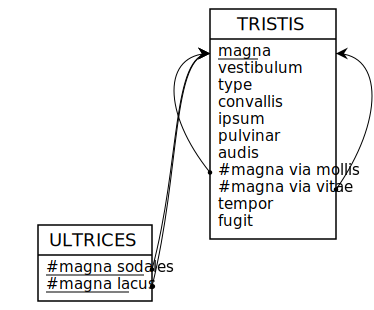

In [110]:
%mocodo --input mocodo_notebook/sandbox.mld

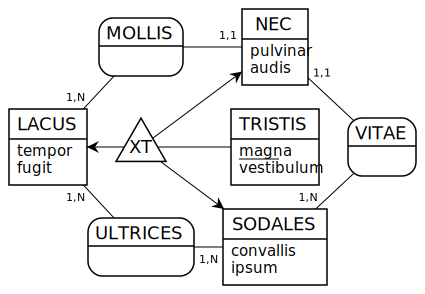

In [111]:
%%mocodo --relations diagram html_verbose
:
MOLLIS, 1N [via mollis] LACUS, 11 NEC
NEC: pulvinar, audis
:

LACUS: tempor, fugit
/XT\ TRISTIS -> SODALES, NEC, LACUS: type
TRISTIS: magna, vestibulum
VITAE, 11 NEC, 1N [via vitae] SODALES

:
ULTRICES, 1N [sodales] SODALES, 1N [lacus] LACUS
SODALES: convallis, ipsum
:

In [112]:
display.HTML("mocodo_notebook/sandbox_verbose.html")

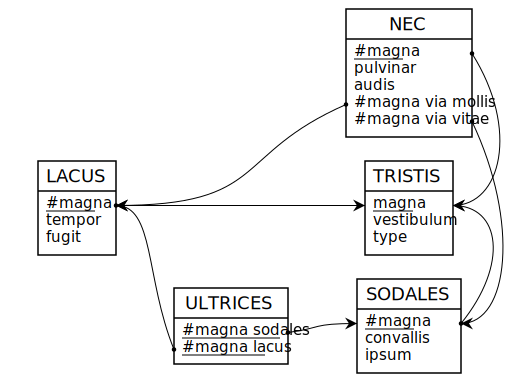

In [113]:
%mocodo --input mocodo_notebook/sandbox.mld

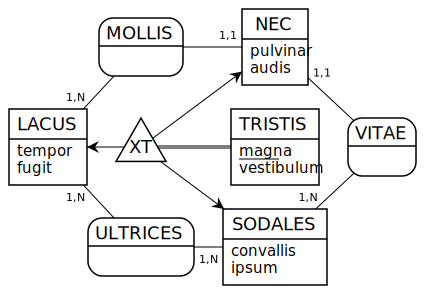

In [114]:
%%mocodo --relations diagram html_verbose
:
MOLLIS, 1N [via mollis] LACUS, 11 NEC
NEC: pulvinar, audis
:

LACUS: tempor, fugit
/XT\ TRISTIS => SODALES, NEC, LACUS: type
TRISTIS: magna, vestibulum
VITAE, 11 NEC, 1N [via vitae] SODALES

:
ULTRICES, 1N [sodales] SODALES, 1N [lacus] LACUS
SODALES: convallis, ipsum
:

In [115]:
display.HTML("mocodo_notebook/sandbox_verbose.html")

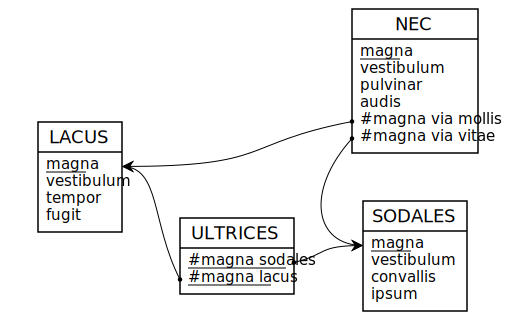

In [116]:
%mocodo --input mocodo_notebook/sandbox.mld

## Construction de repr√©sentations externes

La repr√©sentation interne peut √™tre d√©riv√©e en repr√©sentation externe par l'application d'une sp√©cification de format, ou **gabarit** (_template_ en anglais). Les sch√©mas relationnels affich√©s au-dessous des diagrammes conceptuels dans la pr√©sente section sont un exemple de sortie au format HTML.

### Gabarits inclus dans la distribution

#### Formats lin√©aires

Dans sa repr√©sentation la plus compacte, un sch√©ma relationnel s'√©crit comme une suite de lignes de la forme:

    RELATION ( cl√©_primaire, attribut_1, attribut_2, ...)

Sauf mention contraire, les MLD affich√©s dans ce document ont √©t√© produits par Mocodo au format HTML. Pour un autre exemple, voici la g√©n√©ration et l'affichage d'une sortie $\mathrm\LaTeX$:

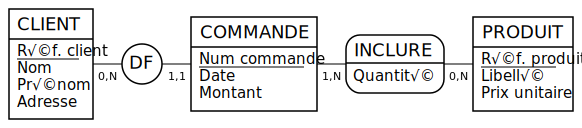

In [117]:
%%mocodo --relations latex
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
DF, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

In [118]:
display.Code("mocodo_notebook/sandbox.tex")

% Copy this before \begin{document}

\usepackage[normalem]{ulem}
\newenvironment{mld}
  {\par\begin{minipage}{\linewidth}\begin{tabular}{rp{0.7\linewidth}}}
  {\end{tabular}\end{minipage}\par}
\newcommand{\relat}[1]{\textsc{#1}}
\newcommand{\attr}[1]{\emph{#1}}
\newcommand{\prim}[1]{\uline{#1}}
\newcommand{\foreign}[1]{\#\textsl{#1}}

% Copy that after \begin{document}

\begin{mld}
  Client & (\prim{R√©f. client}, \attr{Nom}, \attr{Pr√©nom}, \attr{Adresse})\\
  Commande & (\prim{Num commande}, \attr{Date}, \attr{Montant}, \foreign{R√©f. client})\\
  Inclure & (\foreign{\prim{Num commande}}, \foreign{\prim{R√©f. produit}}, \attr{Quantit√©})\\
  Produit & (\prim{R√©f. produit}, \attr{Libell√©}, \attr{Prix unitaire})\\
\end{mld}

Les formats lin√©aires actuellement pris en charge par Mocodo sont les suivants:

| Nom | Argument | Usage du fichier g√©n√©r√© |
|--|--|--|
| [HTML](http://fr.wikipedia.org/wiki/HTML) | html | √Ä ouvrir directement avec un navigateur internet ou un programme de traitement de texte (dont Microsoft Word, OpenOffice, Apple Pages, etc.). Implicite dans un Notebook. |
| [$\mathrm\LaTeX$](http://fr.wikipedia.org/wiki/LaTeX) | latex | √Ä compiler sous $\mathrm\LaTeX$ pour une sortie de haute qualit√© aux formats PDF ou PostScript. |
| [Markdown](http://fr.wikipedia.org/wiki/Markdown) | markdown |  √Ä coller dans une cellule de Notebook, dans un champ textuel de GitHub ou Stack Overflow, ou √† ouvrir avec l'un des nombreux √©diteurs Markdown existants. |
| [Texte brut](http://fr.wikipedia.org/wiki/Fichier_texte) | text | √Ä ouvrir directement avec un √©diteur de texte Unicode. |
| [Txt2tags](http://fr.wikipedia.org/wiki/txt2tags) | txt2tags | √Ä compiler avec le g√©n√©rateur de documents [Txt2tags](http://txt2tags.sourceforge.net/) pour une conversion dans de nombreux autres formats: HTML, XHTML, SGML, LaTeX, Lout, Man page, Wikipedia, Google Code Wiki, DokuWiki, MoinMoin, MagicPoint, PageMaker, texte brut. Non disponible sous Mocodo online. |

#### Formats lin√©aires avec explications

Deux de ces formats, HTML et Markdown, disposent maintenant d'une version augment√©e d'explications d√©taill√©es du m√©canisme du passage au relationnel. Ce type de sortie, adaptable par l'enseignant, peut √™tre utile aux √©tudiants qui souhaitent r√©viser ou travailler en autonomie.

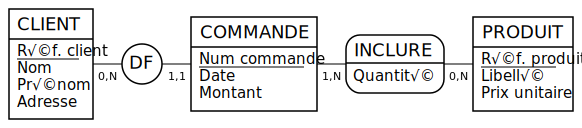

In [119]:
%%mocodo --relations markdown_verbose
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
DF, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

In [120]:
display.Markdown("mocodo_notebook/sandbox_verbose.md")

**CLIENT** (<ins>R√©f. client</ins>, Nom, Pr√©nom, Adresse)  
- Le champ _R√©f. client_ constitue la cl√© primaire de la table. C'√©tait d√©j√† un identifiant de l'entit√© _CLIENT_.  
- Les champs _Nom_, _Pr√©nom_ et _Adresse_ √©taient d√©j√† de simples attributs de l'entit√© _CLIENT_.  

**COMMANDE** (<ins>Num commande</ins>, Date, Montant, _#R√©f. client_)  
- Le champ _Num commande_ constitue la cl√© primaire de la table. C'√©tait d√©j√† un identifiant de l'entit√© _COMMANDE_.  
- Les champs _Date_ et _Montant_ √©taient d√©j√† de simples attributs de l'entit√© _COMMANDE_.  
- Le champ _R√©f. client_ est une cl√© √©trang√®re. Il a migr√© par l'association de d√©pendance fonctionnelle _DF_ √† partir de l'entit√© _CLIENT_ en perdant son caract√®re identifiant.  

**INCLURE** (<ins>_#Num commande_</ins>, <ins>_#R√©f. produit_</ins>, Quantit√©)  
- Le champ _Num commande_ fait partie de la cl√© primaire de la table. C'est une cl√© √©trang√®re qui a migr√© directement √† partir de l'entit√© _COMMANDE_.  
- Le champ _R√©f. produit_ fait partie de la cl√© primaire de la table. C'est une cl√© √©trang√®re qui a migr√© directement √† partir de l'entit√© _PRODUIT_.  
- Le champ _Quantit√©_ √©tait d√©j√† un simple attribut de l'association _INCLURE_.  

**PRODUIT** (<ins>R√©f. produit</ins>, Libell√©, Prix unitaire)  
- Le champ _R√©f. produit_ constitue la cl√© primaire de la table. C'√©tait d√©j√† un identifiant de l'entit√© _PRODUIT_.  
- Les champs _Libell√©_ et _Prix unitaire_ √©taient d√©j√† de simples attributs de l'entit√© _PRODUIT_.

Tout ce texte est g√©n√©r√© automatiquement, mais avec des raffinements destin√©s √† le rendre plus lisible pour un humain. Par exemple, les trois attributs non identifiants de l'entit√© CLIENT sont d√©crits en une seule ligne au lieu de trois.

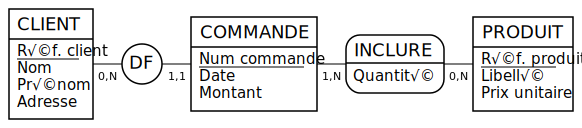

In [121]:
%%mocodo --relations html_verbose
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
DF, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

In [122]:
display.HTML("mocodo_notebook/sandbox_verbose.html")

**Nouveaut√©s de la version 3.**
- Dans la version HTML du sch√©ma relationnel expliqu√©, les explications sont maintenant divulgu√©es √† la demande (balise `<details>`). Cliquez sur CLIENT pour afficher l'explication.
- √Ä des fins de d√©bogage, le survol d'un champ affiche son type interne √† Mocodo et, √©ventuellement, sa table d'origine. Par exemple, survoler #_R√©f. client_ affiche `foreign_key (CLIENT)`.

#### Diagramme relationnel

La plupart des SGBD offrent une repr√©sentation hybride (graphique / texte) de la base, sous la forme d'un ensemble de tables rectangulaires li√©es par des fl√®ches. Mocodo g√©n√®re un fichier d'extension `.mld` qu'il est capable de reprendre en entr√©e pour tracer ce type de graphe.

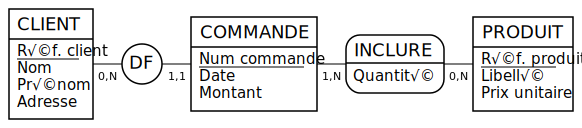

In [123]:
%%mocodo --relations diagram
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
DF, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

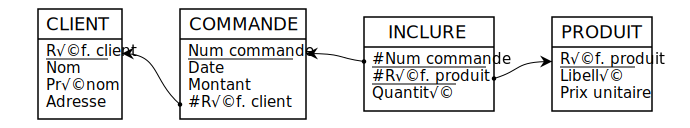

In [124]:
%mocodo --input mocodo_notebook/sandbox.mld

In [125]:
display.Code("mocodo_notebook/sandbox.mld", language="text")

%%mocodo
:
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
:
COMMANDE: Num commande, Date, Montant, #R√©f. client->CLIENT->R√©f. client
:
INCLURE: #Num commande->COMMANDE->Num commande, _#R√©f. produit->PRODUIT->R√©f. produit, Quantit√©
:
PRODUIT: R√©f. produit, Libell√©, Prix unitaire
:

Si l'on ouvre le fichier g√©n√©r√© (_cf._ ci-dessus), on constate que la syntaxe d'un MLD est la m√™me que celle d'un MCD, √† ceci pr√®s que les associations sont remplac√©es par des liens allant de l'attribut `a1` de l'entit√© `E1` √† l'attribut `a2` de l'entit√© `E2`, et qui se notent: `E1: ... a1->E2->a2`.

Les bo√Ætes invisibles automatiquement ins√©r√©es une colonne sur deux a√®rent le r√©sultat de fa√ßon √† laisser de la place aux fl√®ches.

Remarquons que ce pseudo-MCD est un ¬´¬†point fixe¬†¬ª de l'op√©ration de passage au relationnel, c'est-√†-dire qu'il redonne le m√™me MLD que le MCD de d√©part:

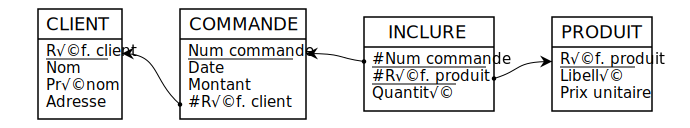

In [126]:
%%mocodo --relations diagram
:
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
:
COMMANDE: Num commande, Date, Montant, #R√©f. client->CLIENT->R√©f. client
:
INCLURE: #Num commande->COMMANDE->Num commande, _#R√©f. produit->PRODUIT->R√©f. produit, Quantit√©
:
PRODUIT: R√©f. produit, Libell√©, Prix unitaire
:

Mais cette fois, comme le ¬´¬†MCD¬†¬ª d'entr√©e ne comporte aucune association, le diagramme relationnel g√©n√©r√© ne comporte aucune fl√®che.

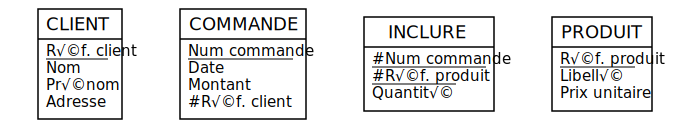

In [127]:
%mocodo --input mocodo_notebook/sandbox.mld

Le reprendre comme texte d'entr√©e produit donc le m√™me diagramme, mais sans les fl√®ches. Leur r√©tablissement pourrait faire l'objet d'un exercice facile.

Sous _Mocodo online_, vous obtiendrez le premier diagramme relationnel en trois √©tapes:

1. g√©n√©rez les relations correspondant au MCD de d√©part (vous aurez coch√© ¬´¬†diagramme relationnel¬†¬ª dans le menu ¬´¬†Options¬†¬ª);
2. copiez-collez la sortie ¬´¬†diagramme relationnel¬†¬ª √† la place du texte d'entr√©e;
3. reg√©n√©rez les relations.

Les relations sont plac√©es dans le m√™me ordre que les bo√Ætes du MCD d'origine, mais vous devrez souvent les r√©organiser (automatiquement ou manuellement) pour obtenir un r√©sultat plus esth√©tique.

Le diagramme relationnel sans fl√®ches s'obtient en r√©p√©tant les √©tapes 2 et 3.

Les versions successives des diff√©rents fichiers √©tant √©cras√©es √† chaque reg√©n√©ration, veillez √† t√©l√©charger l'archive apr√®s chaque √©tape si vous souhaitez garder l'ensemble.

**Limitation.** Les cl√©s √©trang√®res composites sont actuellement repr√©sent√©es comme si elles √©taient s√©par√©es (autant de fl√®ches que de parties).

**Nouveaut√© de la version 2.3.5.** Les tables r√©duites √† une cl√© primaire non composite sont supprim√©es et les √©ventuelles cl√©s √©trang√®res correspondantes perdent leur caract√®re √©tranger. Ainsi, dans le diagramme relationnel de l'[introduction](#Introduction), les tables MATI√àRE et DATE ont disparu et les cl√©s √©trang√®res _libell√© mati√®re_ et _date_ ne sont pas pr√©fix√©es d'un di√®se ou accompagn√©es d'une fl√®che.

#### Sorties SQL

Mocodo est livr√© avec des fichiers de sp√©cification pour les dialectes SQL suivants:

| SGBD | Argument | Suffixe et extension |
|--|--|--|
| [MySQL](https://www.mysql.fr) | `--relations mysql` | `"_mysql.sql"` |
| [Oracle](http://oracle.com) | `--relations oracle` | `"_oracle.sql"` |
| [PostgreSQL](http://postgresql.org) | `--relations postgresql` | `"_postgresql.sql"` |
| [SQLite](http://sqlite.org) | `--relations sqlite` | `"_sqlite.sql"` |

Notez que les contraintes de cl√©s √©trang√®res sont ajout√©es **apr√®s** cr√©ation de l'ensemble des tables, sauf pour SQLite, qui n'impose pas d'ordre de cr√©ation sp√©cifique, et qui de toute fa√ßon ne prend pas en charge ce type d'alt√©ration _a posteriori_.

Le type de donn√©es peut √™tre ins√©r√© entre crochets droits apr√®s chaque attribut:

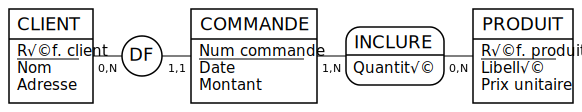

In [128]:
%%mocodo --title=client_commande_produit --relations mysql
CLIENT: R√©f. client [varchar(8)], Nom [varchar(20)], Adresse [varchar(40)]
DF, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande [tinyint(4)], Date [date], Montant [decimal(5,2) DEFAULT '0.00']
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√© [tinyint(4)]
PRODUIT: R√©f. produit [varchar(8)], Libell√© [varchar(20)], Prix unitaire [decimal(5,2)]

Quoique ces informations suppl√©mentaires ne soient pas apparues dans le diagramme conceptuel, elles ont √©t√© exploit√©es par la commande, qui a produit dans le r√©pertoire `mocodo_notebook` un fichier directement ex√©cutable par MySQL:

In [129]:
display.Code(filename="mocodo_notebook/sandbox_mysql.sql", language="mysql")

CREATE DATABASE IF NOT EXISTS `CLIENT_COMMANDE_PRODUIT` DEFAULT CHARACTER SET UTF8MB4 COLLATE utf8_general_ci;
USE `CLIENT_COMMANDE_PRODUIT`;

CREATE TABLE `CLIENT` (
  `r√©f_client` varchar(8),
  `nom` varchar(20),
  `adresse` varchar(40),
  PRIMARY KEY (`r√©f_client`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `COMMANDE` (
  `num_commande` tinyint(4),
  `date` date,
  `montant` decimal(5,2) DEFAULT '0.00',
  `r√©f_client` varchar(8),
  PRIMARY KEY (`num_commande`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `INCLURE` (
  `num_commande` tinyint(4),
  `r√©f_produit` varchar(8),
  `quantit√©` tinyint(4),
  PRIMARY KEY (`num_commande`, `r√©f_produit`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

CREATE TABLE `PRODUIT` (
  `r√©f_produit` varchar(8),
  `libell√©` varchar(20),
  `prix_unitaire` decimal(5,2),
  PRIMARY KEY (`r√©f_produit`)
) ENGINE=InnoDB DEFAULT CHARSET=UTF8MB4;

ALTER TABLE `COMMANDE` ADD FOREIGN KEY (`r√©f_client`) REFERENCES `CLIENT` (`r√©f_client`);
ALTER TABLE `INCLURE` ADD FOREIGN KEY (`r√©f_produit`) REFERENCES `PRODUIT` (`r√©f_produit`);
ALTER TABLE `INCLURE` ADD FOREIGN KEY (`num_commande`) REFERENCES `COMMANDE` (`num_commande`);

**Nouveaut√© de la version 2.0.17.** Les cl√©s √©trang√®res composites sont g√©r√©es (cf. [issue 14](https://github.com/laowantong/mocodo/issues/14)) et les types manquants remplac√©s par `VARCHAR(`[`42`](https://fr.wikipedia.org/wiki/La_grande_question_sur_la_vie,_l%27univers_et_le_reste)):

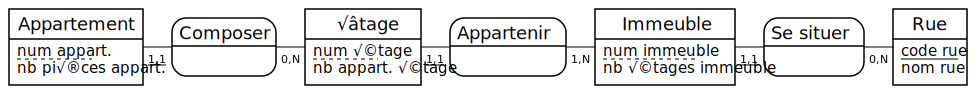

In [130]:
%%mocodo --title=appartements --relations sqlite
Appartement: num appart., nb pi√®ces appart.
Composer, 0N √âtage, _11 Appartement
√âtage: num √©tage, nb appart. √©tage
Appartenir, 1N Immeuble, _11 √âtage
Immeuble: num immeuble, nb √©tages immeuble
Se situer, 0N Rue, _11 Immeuble
Rue: code rue, nom rue

In [131]:
display.Code("mocodo_notebook/sandbox_sqlite.sql")

.open "APPARTEMENTS";

CREATE TABLE "APPARTEMENT" (
  "code_rue" VARCHAR(42),
  "num_immeuble" VARCHAR(42),
  "num_√©tage" VARCHAR(42),
  "num_appart" VARCHAR(42),
  "nb_pi√®ces_appart" VARCHAR(42),
  PRIMARY KEY ("code_rue", "num_immeuble", "num_√©tage", "num_appart"),
  FOREIGN KEY ("code_rue", "num_immeuble", "num_√©tage") REFERENCES "√âTAGE" ("code_rue", "num_immeuble", "num_√©tage")
);

CREATE TABLE "IMMEUBLE" (
  "code_rue" VARCHAR(42),
  "num_immeuble" VARCHAR(42),
  "nb_√©tages_immeuble" VARCHAR(42),
  PRIMARY KEY ("code_rue", "num_immeuble"),
  FOREIGN KEY ("code_rue") REFERENCES "RUE" ("code_rue")
);

CREATE TABLE "RUE" (
  "code_rue" VARCHAR(42),
  "nom_rue" VARCHAR(42),
  PRIMARY KEY ("code_rue")
);

CREATE TABLE "√âTAGE" (
  "code_rue" VARCHAR(42),
  "num_immeuble" VARCHAR(42),
  "num_√©tage" VARCHAR(42),
  "nb_appart_√©tage" VARCHAR(42),
  PRIMARY KEY ("code_rue", "num_immeuble", "num_√©tage"),
  FOREIGN KEY ("code_rue", "num_immeuble") REFERENCES "IMMEUBLE" ("code_rue", "num_immeuble")
);

#### Dictionnaire des donn√©es (bonus)

Qui peut le plus peut le moins: en utilisant un gabarit qui ignore toutes les migrations du passage au relationnel, le m√™me algorithme est capable de construire le dictionnaire des donn√©es, √† savoir la liste des attributs mis en jeu dans votre MCD, avec leur type ou toute autre note plac√©e entre crochets droits apr√®s l'attribut.

In [132]:
%%mocodo --no_mcd --relations markdown_data_dict
CLIENT: R√©f. client [varchar(8)], Nom [varchar(20)], Adresse [varchar(40)]
DF, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande [tinyint(4)], Date [date], Montant [decimal(5,2) DEFAULT '0.00']
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√© [tinyint(4)]
PRODUIT: R√©f. produit [varchar(8)], Libell√© [varchar(20)], Prix unitaire [decimal(5,2)]

In [133]:
display.Markdown("mocodo_notebook/sandbox_data_dict.md")

| Attribut | Informations |
|----------|-------------|
| R√©f. client | _varchar(8)_ |
| Nom | _varchar(20)_ |
| Adresse | _varchar(40)_ |
| Num commande | _tinyint(4)_ |
| Date | _date_ |
| Montant | _decimal(5,2) DEFAULT '0.00'_ |
| Quantit√© | _tinyint(4)_ |
| R√©f. produit | _varchar(8)_ |
| Libell√© | _varchar(20)_ |
| Prix unitaire | _decimal(5,2)_ |

Si l'une au moins des notes est omise, la pr√©sentation g√©n√©r√©e sera sensiblement diff√©rente:

In [134]:
%%mocodo --no_mcd --relations markdown_data_dict
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
PASSER, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√© [nombre d'unit√©s d'un produit donn√© dans une commande donn√©e]
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

In [135]:
display.Markdown("mocodo_notebook/sandbox_data_dict.md")

- R√©f. client
- Nom
- Pr√©nom
- Adresse
- Num commande
- Date
- Montant
- Quantit√©¬†: _nombre d'unit√©s d'un produit donn√© dans une commande donn√©e_
- R√©f. produit
- Libell√©
- Prix unitaire

### Modification ou cr√©ation de nouveaux gabarits

L'algorithme de g√©n√©ration d'une sortie dans tel ou tel format est totalement d√©coupl√© de son entr√©e. Cela signifie que vous pouvez modifier ou cr√©er un format sans √©crire une seule ligne de code, mais en remplissant une esp√®ce de formulaire, ou gabarit, qui est un simple fichier JSON. Si vous n'avez aucune vell√©it√© de le faire, vous pouvez sauter cette section. Sinon, accrochez-vous, √ßa va devenir un peu technique.

#### Algorithme

Pour apprendre √† sp√©cifier un format, le mieux est d'√©tudier les gabarits livr√©s dans le dossier `relation_templates`. Les quelques indications donn√©es ici devraient suffire √† vous √©pargner la lecture du code proprement dit.

Chaque gabarit est un fichier JSON associant des cl√©s pr√©d√©finies √† des valeurs librement modifiables. Dans sa forme la plus simple, √† savoir le format ¬´¬†texte brut¬†¬ª, le fichier (`text.json`) se r√©duit √† trois lignes:

```json
{
  "extension": ".txt"
}
```

La cl√© `"extension"` est en effet la seule cl√© obligatoire d'un tel fichier. Ici, elle est associ√©e √† la valeur `".txt"`.

Les autres cl√©s possibles, toutes facultatives, appartiennent √† quatre cat√©gories:

| Cat√©gorie | Forme de la cl√© | Valeur associ√©e | Description |
|--|--|--|--|
| Transformation | `"transform_..."` | objet | Op√®re une recherche-remplacement, √©ventuellement it√©r√©e (jusqu'√† ce qu'aucun remplacement ne soit plus possible), sur une partie du texte d√©j√† g√©n√©r√©. Les champs `"search"` et `"replace`" sont obligatoires, le champ `"iterated"` (bool√©en) est facultatif. La syntaxe est celle des [expressions r√©guli√®res de Python](https://docs.python.org/3/library/re.html#regular-expression-syntax). |
| Composition | `"compose_..."` | cha√Æne de format | Interpole dans une cha√Æne certains identificateurs pr√©d√©finis par une valeur d√©pendant du contexte en cours. La syntaxe est celle utilis√©e par la [m√©thode `.format()` de Python](https://docs.python.org/3/library/string.html#format-string-syntax). |
| Concat√©nation | `"..._separator"` | cha√Æne | Concat√®ne une liste de cha√Ænes en les s√©parant par une cha√Æne donn√©e. |
| cl√© de tri | `"..._sorting_key"` | objet | Extrait la cl√© de tri pour la liste concern√©e. L'expression r√©guli√®re `"search"` contient une ou des parenth√®ses capturantes qui sont ensuite rappel√©es dans l'expression `"replace"` |

Voici les diff√©rentes op√©rations effectu√©es par l'algorithme, dans l'ordre de son d√©roulement:

1. Toutes les cl√©s absentes du gabarit sont ajout√©es, avec des valeurs par d√©faut pertinentes.
2. `"transform_attribute"` applique une premi√®re transformation √† chaque attribut (identificateur `attribute`). Il s'agit en g√©n√©ral de supprimer ou remplacer les caract√®res interdits par le format-cible. Le r√©sultat est r√©f√©renc√© par un nouvel identificateur, appel√© `"raw_label"`.
3. Diff√©rentes capitalisations de ce libell√© sont ajout√©es sous les noms de `"raw_label_lowercase"` (minuscules),  `"raw_label_uppercase"` (majuscules) et  `"raw_label_titlecase"` (majuscules initiales).
4. `"compose_label_disambiguated_by_note"` cr√©e sous le nom de `"label"` une copie de `"raw_label"`, en introduisant en plus dans les cl√©s √©trang√®res les notes des pattes correspondantes. La valeur par d√©faut est `"{raw_label} {leg_note}"`, mais pour plus de libert√© on peut tr√®s bien imaginer de remplacer le label par l'note elle-m√™me (avec `"{leg_note}"`). Cette composition est optionnelle: pour la d√©sactiver, passer l'option `disambiguation=numbers_only`.
4. <a id='disambiguation_by_number'></a>`"compose_label_disambiguated_by_number"` diff√©rencie les libell√©s homonymes d'une m√™me relation en leur ajoutant un num√©ro. Par exemple, et c'est la valeur par d√©faut, pour suffixer le libell√© par un point suivi de ce num√©ro, on √©crira: `"{label}.{disambiguation_number}"`. L'identificateur `"label"` est mis √† jour avec le r√©sultat. C'est lui que l'utilisateur utilisera en g√©n√©ral dans la suite de l'algorithme, mais il a encore acc√®s aux variantes pr√©c√©dentes.
5. Diff√©rentes capitalisations de ce libell√© sont ajout√©es: `"label_lowercase"`, `"label_uppercase"` et  `"label_titlecase"`.
6. `"transform_title"` re√ßoit le nom du MCD. Le r√©sultat et ses capitalisations sont associ√©s aux identificateurs `"title"`, `"title_lowercase"`, `"title_uppercase"` et  `"title_titlecase"`.
7. Ensuite, pour chacune des relations cr√©√©es dans la repr√©sentation interne:

  1. `"transform_relation_name"` applique une transformation au nom de la relation et l'associe, avec ses capitalisations, aux identificateurs `"this_relation_name"`, `"this_relation_name_lowercase"`, `"this_relation_name_uppercase"` et  `"this_relation_name_titlecase"`.
  2. Le num√©ro d'ordre de la relation est associ√© √† l'identificateur `"this_relation_number"`.
  3. Pour chaque colonne de la relation en cours:

    1. Si l'attribut a migr√© depuis une entit√©, le nom de la relation correspondante est associ√©, avec ses capitalisations, aux identificateurs `"primary_relation_name"`, `"primary_relation_name_lowercase"`, `"primary_relation_name_uppercase"` et  `"primary_relation_name_titlecase"`. Dans le cas contraire, tous ces identificateurs sont associ√©s √† la cha√Æne vide.
    2. Si l'attribut a migr√© par une association, le nom de celle-ci est associ√©, avec ses capitalisations, aux identificateurs `"association_name"`, `"association_name_lowercase"`, `"association_name_uppercase"` et  `"association_name_titlecase"`. Dans le cas contraire, tous ces identificateurs sont associ√©s √† la cha√Æne vide.
    3. la composition `"compose_[attribute_nature]"` est appliqu√©e, _cf._ le paragraphe [Composition des attributs selon leur nature](#Composition-des-attributs-selon-leur-nature). Le r√©sultat est accumul√© dans une liste de colonnes, en deux versions: dans l'ordre de leur √©num√©ration, ou tri√©e selon la cl√© sp√©cifi√©e dans `"column_sorting_key"`.
  4. `"column_separator"` joint chacune de ces listes de cha√Ænes et associe le r√©sultat √† l'identificateur `"columns"` et `"sorted_columns"` (respectivement).
  5. `"compose_relation"` construit une relation compl√®te avec tous ses attributs. Par exemple, et c'est la valeur par d√©faut, `"{this_relation_name} ({columns})"` est utilis√© dans les [formats lin√©aires](#Formats-lin%C3%A9aires).
  6. `"transform_single_column_relation"` s'applique √† ce dernier r√©sultat lorsque la relation est r√©duite √† un seul attribut (l'usage est d'en proposer la suppression en la mettant en commentaire).
  7. `"transform_forced_relation"` est appliqu√© aux associations DF dont la conversion en table a √©t√© forc√©e manuellement.
  8. `"transform_relation"` est appliqu√© syst√©matiquement, et le r√©sultat est accumul√© dans une liste de relations, en deux versions: dans l'ordre de leur √©num√©ration, ou tri√©e selon la cl√© sp√©cifi√©e dans `"relation_sorting_key"`.
8. `"relation_separator"` joint chacune de ces listes de cha√Ænes et associe le r√©sultat √† l'identificateur `"relations"` et `"sorted_relations"` (respectivement).
9. `"compose_relational_schema"` construit un sch√©ma relationnel complet avec son titre et toutes ses relations. La valeur par d√©faut est simplement `"{relations}"`.
10. `"transform_relational_schema"` applique une derni√®re transformation au sch√©ma complet, et renvoie le r√©sultat final.

#### Identificateurs disponibles pour la composition de cha√Ænes

Mocodo _offline_ est livr√© avec un gabarit sp√©cialement con√ßu pour vous aider √† en cr√©er de nouveaux. Il vous permet de tester sur n'importe quel MCD la g√©n√©ration d'un objet JSON contenant la valeur de tous les identificateurs disponibles pour la composition au niveau de chaque attribut.

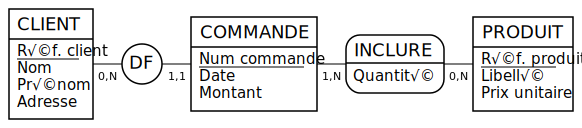

In [136]:
%%mocodo --title client_commande_produit --relations json
CLIENT: R√©f. client, Nom, Pr√©nom, Adresse
DF, 0N CLIENT, 11 COMMANDE
COMMANDE: Num commande, Date, Montant
INCLURE, 1N COMMANDE, 0N PRODUIT: Quantit√©
PRODUIT: R√©f. produit, Libell√©, Prix unitaire

Le contexte d'un attribut donne acc√®s √† 32 identificateurs:

- 4 sp√©cifiques √† la base;
- 5 sp√©cifiques √† la relation;
- 23 sp√©cifiques √† l'attribut.

S'y ajoutent `"columns"`, `"sorted_columns"`, et `"relations"`, `"sorted_relations"`, qui n'ont de sens que dans le contexte de `"compose_relation"` et `"compose_relational_schema"`(respectivement).

Le fichier JSON est trop long pour √™tre list√© dans son int√©gralit√© ici, mais en voici le d√©but, qui concerne la cl√© primaire _R√©f. client_ de la relation _Client_ de la base _client_commande_produit_.

In [137]:
display.Code("mocodo_notebook/sandbox.json")

{
  "title": "client_commande_produit",
  "title_lowercase": "client_commande_produit",
  "title_uppercase": "CLIENT_COMMANDE_PRODUIT",
  "title_titlecase": "Client_commande_produit",
  "relations": [
    {
      "this_relation_name": "CLIENT",
      "this_relation_name_lowercase": "client",
      "this_relation_name_uppercase": "CLIENT",
      "this_relation_name_titlecase": "Client",
      "is_forced": "False",
      "columns": [
        {
          "attribute": "R√©f. client",
          "raw_label": "R√©f. client",
          "raw_label_lowercase": "r√©f. client",
          "raw_label_uppercase": "R√âF. CLIENT",
          "raw_label_titlecase": "R√©f. client",
          "disambiguation_number": null,
          "label": "R√©f. client",
          "label_lowercase": "r√©f. client",
          "label_uppercase": "R√âF. CLIENT",
          "label_titlecase": "R√©f. client",
          "primary": true,
          "nature": "primary_key",
          "data_type": null,
          "association_name": null,
          "association_name_lower_case": null,
          "association_name_uppercase": null,
          "association_name_titlecase": null,
          "leg_note": null,
          "outer_source": null,
          "outer_source_lowercase": null,
          "outer_source_uppercase": null,
          "outer_source_titlecase": null
        },
        {
          "attribute": "Nom",
          "raw_label": "Nom",
          "raw_label_lowercase": "nom",
          "raw_label_uppercase": "NOM",
          "raw_label_titlecase": "Nom",
          "disambiguation_number": null,
          "label": "Nom",
          "label_lowercase": "nom",
          "label_uppercase": "NOM",
          "label_titlecase": "Nom",
          "primary": false,
          "nature": "normal_attribute",
          "data_type": null,
          "association_name": null,
          "association_name_lower_case": null,
          "association_name_uppercase": null,
          "association_name_titlecase": null,
          "leg_note": null,
          "outer_source": null,
          "outer_source_lowercase": null,
          "outer_source_uppercase": null,
          "outer_source_titlecase": null
        },
        {
          "attribute": "Pr√©nom",
          "raw_label": "Pr√©nom",
          "raw_label_lowercase": "pr√©nom",
          "raw_label_uppercase": "PR√âNOM",
          "raw_label_titlecase": "Pr√©nom",
          "disambiguation_number": null,
          "label": "Pr√©nom",
          "label_lowercase": "pr√©nom",
          "label_uppercase": "PR√âNOM",
          "label_titlecase": "Pr√©nom",
          "primary": false,
          "nature": "normal_attribute",
          "data_type": null,
          "association_name": null,
          "association_name_lower_case": null,
          "association_name_uppercase": null,
          "association_name_titlecase": null,
          "leg_note": null,
          "outer_source": null,
          "outer_source_lowercase": null,
          "outer_source_uppercase": null,
          "outer_source_titlecase": null
        },
        {
          "attribute": "Adresse",
          "raw_label": "Adresse",
          "raw_label_lowercase": "adresse",
          "raw_label_uppercase": "ADRESSE",
          "raw_label_titlecase": "Adresse",
          "disambiguation_number": null,
          "label": "Adresse",
          "label_lowercase": "adresse",
          "label_uppercase": "ADRESSE",
          "label_titlecase": "Adresse",
          "primary": false,
          "nature": "normal_attribute",
          "data_type": null,
          "association_name": null,
          "association_name_lower_case": null,
          "association_name_uppercase": null,
          "association_name_titlecase": null,
          "leg_note": null,
          "outer_source": null,
          "outer_source_lowercase": null,
          "outer_source_uppercase": null,
          "outer_source_titlecase": null
        }
      ]
    },
    {
      "this_relation_name": "COMMANDE",
      "this_relation_name

Ce fragment est √† premi√®re vue tr√®s redondant. En cas de doute, reportez-vous aux tests `relations_tests.py` dans le code-source pour un √©ventail de cas discriminants.

#### Composition des attributs selon leur nature

**Avertissement.** Cette section d√©crit la version 2 et n'a pas √©t√© compl√©t√©e pour Mocodo 3.

La composition appliqu√©e √† un attribut est au c≈ìur de la construction d'une repr√©sentation externe. √Ä cette √©tape, la repr√©sentation interne a permis de distinguer 9 cat√©gories d'attributs, 6 courantes et 3 exceptionnelles. Avant de pouvoir exploiter cette classification, il faut la comprendre en d√©tail. Nous allons la pr√©senter √† travers deux exemples, le premier r√©pertoriant tous les cas courants, le second tous les cas exceptionnels.

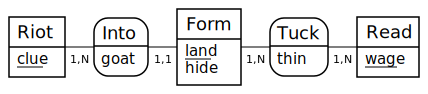

In [138]:
%%mocodo --relations html_verbose
Riot: clue
Into, 11 Form, 1N Riot: goat
Form: land, hide
Tuck, 1N Read, 1N Form: thin
Read: wage

In [139]:
display.HTML("mocodo_notebook/sandbox_verbose.html")

| Identificateur | Attribut concern√© | D√©faut | Exemple | 
|--|--|--|--|
| `compose_primary_key` | identifiant rest√© sur place lors de la transformation d'une entit√© en table | `"_{label}_"` | _land_ de **Form** |
| `compose_normal_attribute` | simple attribut rest√© sur place lors de la transformation d'une entit√© en table | `"{label}"` | _hide_ de **Form** |
| `compose_foreign_key` | cl√© √©trang√®re ayant migr√© par une d√©pendance fonctionnelle disparue, tout en perdant son caract√®re identifiant | `"#{label}"` | _clue_ de **Form** |
| `compose_foreign_attribute` | attribut √©tranger ayant migr√© d'une d√©pendance fonctionnelle disparue | m√™me valeur que `compose_normal_attribute` | _goat_ de **Form** |
| `compose_foreign_primary_key` | cl√© √©trang√®re primaire migr√© dans une association devenue table, tout en gardant son caract√®re identifiant  | `"_#{label}_"` | _wage_ et _land_ de **Tuck** |
| `compose_association_attribute` | simple attribut rest√© sur place lors de la transformation d'une association en table | m√™me valeur que `compose_normal_attribute` | _thin_ de **Tuck** |

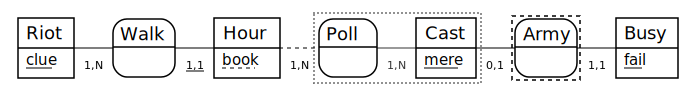

In [140]:
%%mocodo --relations html_verbose
Riot: clue
Walk, 1N Riot, _11 Hour
Hour: book
Poll, 1N Cast, /1N Hour
Cast: mere
[Army], 11 Busy, 01 Cast
Busy: fail

In [141]:
display.HTML("mocodo_notebook/sandbox_verbose.html")

| Identificateur | Attribut concern√© | D√©faut | Exemple | 
|----------------|-------------------|--------|---------|
| `compose_strengthening_primary_key` | cl√© primaire de renforcement d'une entit√© faible | m√™me valeur que `compose_foreign_primary_key` | _clue_ de **Hour** |
| `compose_demoted_foreign_key` | cl√© √©trang√®re ayant migr√© dans une association devenue table, mais r√©trograd√©e explicitement au rang de simple attribut | m√™me valeur que `compose_foreign_key` | _book_ et _clue_ de **Poll** |
| `compose_primary_foreign_key` | cl√© √©trang√®re non primaire ayant migr√© dans une d√©pendance fonctionnelle explicitement promue au rang de table |  | _fail_ et _mere_ de **Army** |

#### Gabarit vide

Voici pour r√©f√©rence un gabarit JSON pr√™t √† l'emploi, √† partir duquel vous pourrez cr√©er les v√¥tres. Il comporte l'int√©gralit√© des identificateurs disponibles, avec leur valeur par d√©faut et dans l'ordre de d√©roulement de l'algorithme:

```
{
    "extension": "requis: pas de valeur par d√©faut",
    "transform_attribute": [],
    "transform_title": [],
    "transform_data_type": [],
    "compose_label_disambiguated_by_note": "{raw_label} {leg_note}",
    "compose_label_disambiguated_by_number": "{label}.{disambiguation_number}",
    "compose_primary_key": "_{label}_",
    "compose_normal_attribute": "{label}",
    "compose_foreign_key": "#{label}",
    "compose_foreign_attribute": "par d√©faut, m√™me valeur que compose_normal_attribute",
    "compose_foreign_primary_key": "_#{label}_",
    "compose_association_attribute": "par d√©faut, m√™me valeur que compose_normal_attribute",
    "compose_strengthening_primary_key": "par d√©faut, m√™me valeur que compose_foreign_primary_key",
    "compose_demoted_foreign_key": "par d√©faut, m√™me valeur que compose_foreign_key",
    "compose_promoting_foreign_key": "par d√©faut, m√™me valeur que compose_foreign_key",
    "transform_relation_name": [],
    "column_sorting_key": {
        "search": "(.+)",
        "replace": "\\1"
    },
    "column_separator": ", ",
    "compose_relation": "{this_relation_name} ({columns})",
    "transform_single_column_relation": [],
    "transform_forced_relation": [],
    "transform_relation": [],
    "relation_sorting_key": {
        "search": "(.+)",
        "replace": "\\1"
    },
    "relation_separator": "\n",
    "compose_relational_schema": "{relations}",
    "transform_relational_schema": []
}
```

# Cr√©dits

- **Auteur**
  - Aristide Grange, Universit√© de Lorraine, Metz, [LCOMS](http://lcoms.univ-lorraine.fr).
- **Outils**
  - Aspect visuel
    - [Color Brewer](http://colorbrewer2.org) (Cynthia Brewer).
    - [Font Awesome](http://fortawesome.github.io/Font-Awesome/) (Dave Gandy).
    - [Fork me on GitHub Retina Ribbons](https://ar.al/scribbles/fork-me-on-github-retina-ribbons/) (Aral Balkan).
    - [Real Favicon Generator](http://realfavicongenerator.net) (Philippe Bernard).
    - [reset.css](http://meyerweb.com/eric/tools/css/reset/) (Eric Meyer).
    - [Source Code Pro](https://github.com/adobe-fonts/source-code-pro) (Paul D. Hunt).
  - JavaScript
    - [JQuery](http://jquery.com/) (John Resig).
    - [JS-Cookie](https://github.com/js-cookie/js-cookie) (Klaus Hartl).
  - Python
    - [Distance de Damerau-Levenshtein](http://mwh.geek.nz/2009/04/26/python-damerau-levenshtein-distance/) (Michael Homer).
- **[Localisation](https://www.transifex.com/aristide/mocodo/)**
  - Allemand: Pascal Fickert, Luis Willnat.
  - Chinois: Liu Jingjiao.
  - Fran√ßais: Aristide Grange.
- **Sans oublier** 
  Abou-Sophiane Belhadj,
  Kamel Chelghoum,
  R√©mi Da Costa,
  Benjamin Gannat,
  Thomas Giro,
  Michel Grandmougin,
  Alexandre Grison,
  David Lorge,
  Dorian Mahut,
  S√©bastien Martin,
  Cyril Minette,
  Idris Neumann,
  Bryan Oakley,
  Georges Perec,
  C√©dric Poinsaint,
  Zsuzsanna R√≥ka,
  Florian Rom√©o,
  Tong Ji
  et d'innombrables contributeurs de [Stack Overflow](http://stackoverflow.com).